### 1. Project Information

**Project Title** : Application of Machine Learning for Imports-Exports Dataset Analysis

**Name and Roll Nos** : 055044, Shefali Pujara and 055058, Vandana Jain

**Group No** : Group 8

### 2. Description of Data

- **Data Source**: [Kaggle Imports-Exports Dataset](https://www.kaggle.com/datasets/chakilamvishwas/imports-exports-15000)
- **Data Size**: ~2 MB
- **Data Type**: Cross-sectional
- **Data Dimension**: 16 Variables, 15,000 Observations
- **Data Variable Type**:
  - **Numeric**: Integer, Decimal
  - **Non-Numeric**: Categorical
- **Data Variable Category-I**:
  - **Index**: Transaction_ID
  - **Categorical (Nominal)**: Country, Product, Import_Export, Shipping_Method
  - **Categorical (Ordinal)**: Payment_Terms
  - **Non-Categorical**: Quantity, Value, Weight
- **Data Variable Category-II**:
  - **Input Variables or Features**: All variables except Import_Export
  - **Outcome Variable(s) or Feature(s)**: Import_Export
- **About Dataset**: The dataset contains transactional records of imports and exports across various countries, products, and ports. It includes details about shipment weight, value, and shipping methods, providing ample scope for clustering and classification tasks.


### 3. Project Objectives & Problem Statements

**Unsupervised Machine Learning: Clustering**





**Project Objectives:**



*   Segmentation of the imports-exports dataset using unsupervised machine learning clustering algorithms (K-Means).
*   Identification of the optimal number of clusters for the dataset based on evaluation metrics (Silhouette Score, Davies-Bouldin Score).
*  Characterization of the identified clusters based on the distribution of variables like Quantity, Value, Weight, Import_Export, Category, Shipping_Method, and Payment_Terms.





**Problem Statements:**

*   How can the imports-exports dataset be effectively segmented into meaningful clusters using K-Means clustering?
*   What is the most appropriate number of clusters for representing the underlying structure of the data?
*   What are the key characteristics and distinguishing features of each identified cluster in terms of the included variables?


### 4. Analysis of Data

In [1]:
#Import relevant libraries
import pandas as pd
import statsmodels.stats.descriptivestats as dstats
import numpy as np  # For Data Manipulation
from sklearn.preprocessing import OrdinalEncoder  # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.impute import SimpleImputer  # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # For Rescaling Data
from sklearn.model_selection import train_test_split  # For Splitting Data into Training & Testing Sets
import matplotlib.pyplot as plt
import seaborn as sns  # For Data Visualization
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import statsmodels.api as sm
import io
import requests
from scipy.stats import shapiro
from scipy.stats import spearmanr, kendalltau
from scipy.stats import skew, kurtosis, pearsonr, norm
from scipy.stats import chi2_contingency
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import export_text

In [2]:
#Load the dataset
sp44_file_id = '1PI0lJF4TrHIrPoFyyELVy1SP_ca5goRg'
sp44_url = f'https://drive.google.com/uc?id={sp44_file_id}'

# Fetch the data using requests
sp44_response = requests.get(sp44_url)
sp44_response.raise_for_status()  # Raise an exception for bad responses

# Read the data into a pandas DataFrame using io
sp44_imports_exports = pd.read_csv(io.StringIO(sp44_response.text))

# Display the first few rows of the DataFrame
sp44_imports_exports.head()

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,describe,Export,1979,9506.57,07-12-2023,Machinery,Robertbury,620537,4248.65,Air,"Garrison, Hubbard and Hendricks",Seth Hall,21000294,Cash on Delivery
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,president,Export,5763,7100.91,04-04-2023,Clothing,Shahport,927600,4340.81,Air,Webb-Mack,Kimberly Ryan,88738432,Prepaid
2,eb1167b3-67a9-4378-bc65-c1e582e2e662,Turkey,far,Import,5740,2450.34,21-08-2024,Electronics,South Joshuatown,299258,4538.41,Air,"Mendez, Jones and Johnson",Ryan Silva,89922099,Prepaid
3,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,agency,Export,2592,7226.42,09-05-2022,Furniture,Adamfort,996084,4886.14,Air,Schroeder-Smith,Jacob Gray,63216265,Net 60
4,e443df78-9558-467f-9ba9-1faf7a024204,Finland,policy,Export,2622,2817.29,03-04-2023,Electronics,Juliebury,555981,4406.74,Air,Zimmerman LLC,Amy Stephens,94600248,Cash on Delivery


In [3]:
sp44_imports_exports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   15000 non-null  object 
 1   Country          15000 non-null  object 
 2   Product          15000 non-null  object 
 3   Import_Export    15000 non-null  object 
 4   Quantity         15000 non-null  int64  
 5   Value            15000 non-null  float64
 6   Date             15000 non-null  object 
 7   Category         15000 non-null  object 
 8   Port             15000 non-null  object 
 9   Customs_Code     15000 non-null  int64  
 10  Weight           15000 non-null  float64
 11  Shipping_Method  15000 non-null  object 
 12  Supplier         15000 non-null  object 
 13  Customer         15000 non-null  object 
 14  Invoice_Number   15000 non-null  int64  
 15  Payment_Terms    15000 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 1.8+ MB


In [4]:
sp44_imports_exports.columns

Index(['Transaction_ID', 'Country', 'Product', 'Import_Export', 'Quantity',
       'Value', 'Date', 'Category', 'Port', 'Customs_Code', 'Weight',
       'Shipping_Method', 'Supplier', 'Customer', 'Invoice_Number',
       'Payment_Terms'],
      dtype='object')

In [5]:
sp44_ds = sp44_imports_exports.sample(n = 5001, random_state=55044 )
sp44_ds.head()

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
14780,2957bb33-b434-4e8f-bc08-9ce4fd525241,Malawi,grow,Import,5614,7373.68,20-03-2024,Machinery,Lake Craig,225516,4685.54,Land,"Jones, Suarez and Jordan",Amy Howell,32428864,Prepaid
4236,1d57aab1-aa63-4546-8c5f-b1522098054e,United States of America,economy,Import,7706,3525.97,22-01-2020,Machinery,Lake Samanthafort,671539,1889.91,Land,Bond-Carter,Tara Kennedy,90817396,Prepaid
11886,d124e688-69fe-4df9-bfbc-5c5e7849d86a,United States of America,feel,Export,8885,7046.93,24-05-2023,Clothing,West Joseph,360397,558.87,Sea,"Johnson, Logan and Young",Amy Ortiz,26049042,Net 30
12356,39485263-8590-4aef-acbc-e86c10c56f02,Andorra,really,Import,5842,2515.30,17-12-2020,Machinery,New Glennchester,421868,1378.09,Air,Wilkinson-Miller,James Lynch,87284282,Cash on Delivery
2902,1662cd63-4b10-48e0-a10d-8698368f215b,Tokelau,out,Export,5506,5722.99,09-08-2020,Toys,North Robert,489382,4874.41,Sea,"Garcia, Pittman and Barrera",Ashley Lloyd,77059257,Net 60


In [6]:
sp44_ds.describe()

,Quantity,Value,Customs_Code,Weight,Invoice_Number
count,5001.000000,5001.000000,5001.000000,5001.000000,5.001000e+03
mean,4932.059988,5032.822320,543703.880824,2506.524185,4.973608e+07
std,2873.007912,2866.861919,261702.376394,1438.922385,2.882041e+07
min,5.000000,103.030000,100171.000000,1.520000,4.798200e+04
25%,2494.000000,2535.290000,316771.000000,1267.540000,2.470761e+07
50%,4839.000000,5051.510000,535996.000000,2464.390000,4.961700e+07
75%,7463.000000,7517.360000,775929.000000,3758.950000,7.470305e+07
max,9995.000000,9999.130000,999964.000000,4998.010000,9.999723e+07


          Quantity        Value   Customs_Code       Weight  Invoice_Number
count  5001.000000  5001.000000    5001.000000  5001.000000    5.001000e+03
mean   4932.059988  5032.822320  543703.880824  2506.524185    4.973608e+07
std    2873.007912  2866.861919  261702.376394  1438.922385    2.882041e+07
min       5.000000   103.030000  100171.000000     1.520000    4.798200e+04
25%    2494.000000  2535.290000  316771.000000  1267.540000    2.470761e+07
50%    4839.000000  5051.510000  535996.000000  2464.390000    4.961700e+07
75%    7463.000000  7517.360000  775929.000000  3758.950000    7.470305e+07
max    9995.000000  9999.130000  999964.000000  4998.010000    9.999723e+07


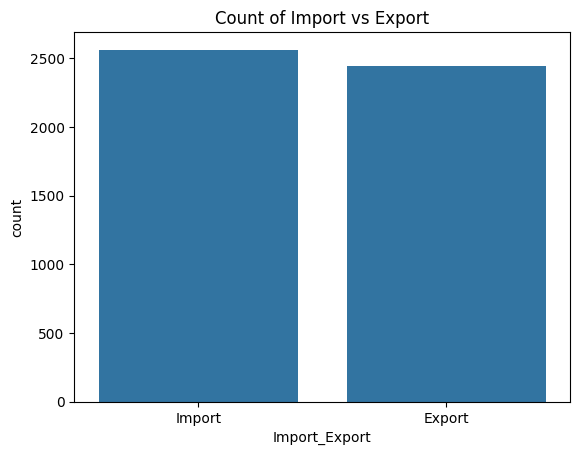

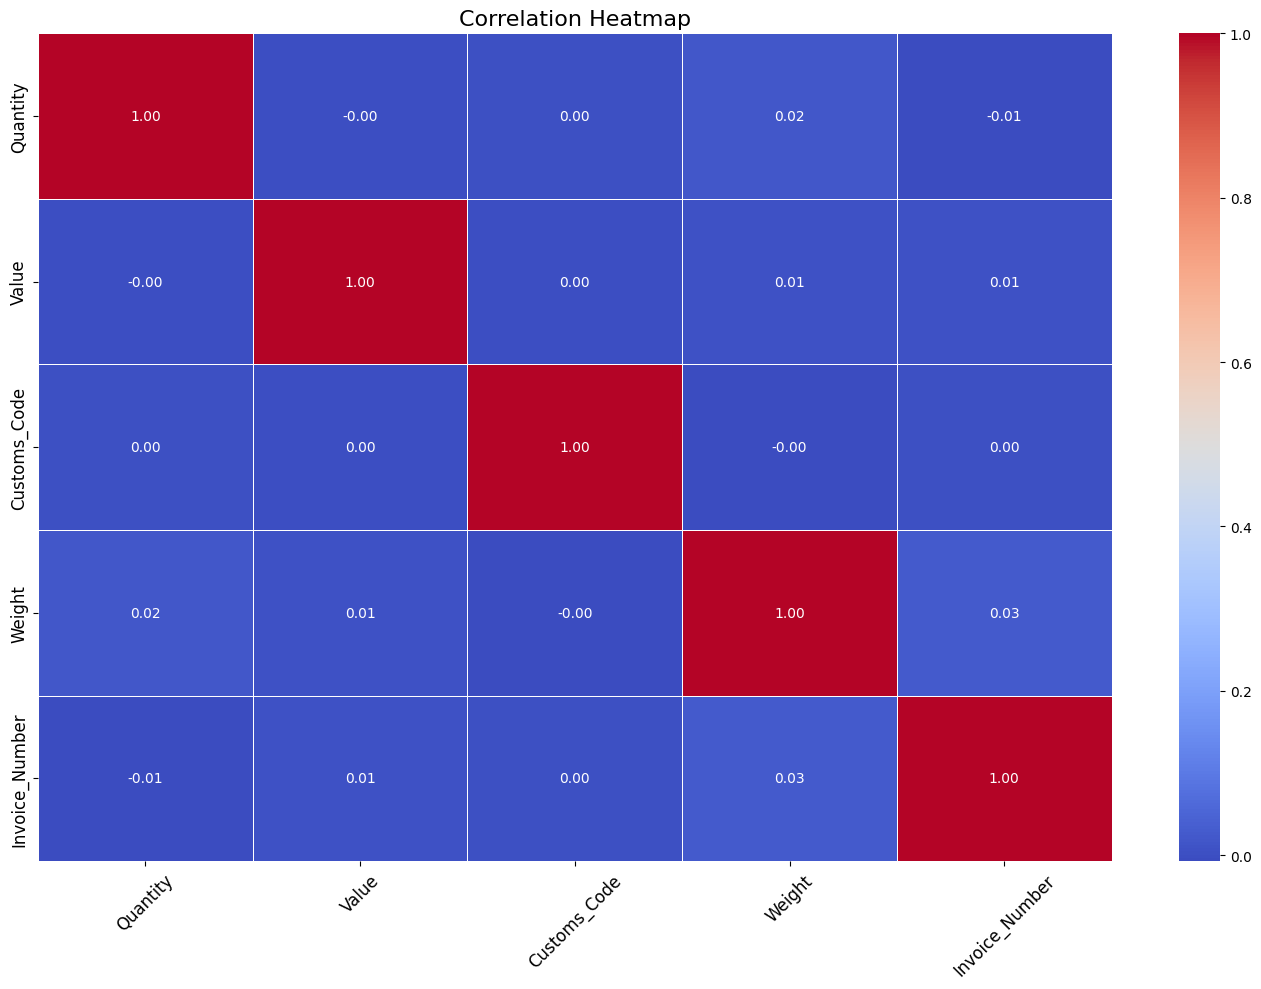

In [7]:
# Descriptive Statistics
print(sp44_ds.describe())

# Visualizations
# Bar Plot for a Categorical Column
sns.countplot(x='Import_Export', data=sp44_ds)
plt.title('Count of Import vs Export')
plt.show()

# Heatmap for Correlation (excluding non-numeric columns)
plt.figure(figsize=(14, 10))  # Increased figure size
numeric_ds = sp44_ds.select_dtypes(include=['number'])  # Select only numeric columns for correlation
sns.heatmap(
    numeric_ds.corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    cbar=True
)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)
plt.tight_layout()  # Ensure labels are not cut off
plt.show()


In [8]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming your non-categorical data is in a DataFrame called 'sp44_ds'

def descriptive_stats(df):
    """
    Calculates descriptive statistics for non-categorical variables.

    Args:
        df: DataFrame containing non-categorical data.

    Returns:
        DataFrame with descriptive statistics.
    """

    stats_list = []  # Initialize as a list to store rows as dictionaries
    for col in df.columns:
        # Central Tendency
        minimum = df[col].min()
        maximum = df[col].max()
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode()[0]  # Taking the first mode if multiple exist
        percentiles = np.percentile(df[col], [25, 50, 75])

        # Dispersion
        range_val = maximum - minimum
        std_dev = df[col].std()
        skewness = df[col].skew()
        kurtosis = df[col].kurtosis()

        # Correlations (assuming another column 'other_col' for correlation)
        # Replace 'other_col' with the actual column name if needed
        if len(df.columns) > 1:
            other_col = df.columns[df.columns != col][0]  #selecting another column
            pearson_corr = df[col].corr(df[other_col], method='pearson')
            spearman_corr = df[col].corr(df[other_col], method='spearman')
        else:
            pearson_corr = np.nan  # Or any appropriate value
            spearman_corr = np.nan  # Or any appropriate value

        # Composite Measures
        coeff_var = std_dev / mean if mean != 0 else np.nan  # Avoid division by zero
        conf_interval = stats.t.interval(0.95, len(df[col]) - 1, loc=mean, scale=stats.sem(df[col]))

        # Append a dictionary for each row to the list
        stats_list.append({
            'Variable': col,
            'Min': minimum,
            'Max': maximum,
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            '25th Percentile': percentiles[0],
            '50th Percentile': percentiles[1],
            '75th Percentile': percentiles[2],
            'Range': range_val,
            'Standard Deviation': std_dev,
            'Skewness': skewness,
            'Kurtosis': kurtosis,
            'Pearson Correlation': pearson_corr,
            'Spearman Correlation': spearman_corr,
            'Coefficient of Variation': coeff_var,
            'Confidence Interval (95%)': conf_interval
        })

    # Create the DataFrame from the list of dictionaries
    stats_df = pd.DataFrame(stats_list)

    return stats_df

# Example usage with your non-categorical DataFrame:
sp44_ds_noncat = sp44_ds[['Quantity', 'Value', 'Weight']]
descriptive_stats_df = descriptive_stats(sp44_ds_noncat)
print(descriptive_stats_df)

   Variable     Min      Max         Mean   Median     Mode  25th Percentile  \
0  Quantity    5.00  9995.00  4932.059988  4839.00  1633.00          2494.00   
1     Value  103.03  9999.13  5032.822320  5051.51   241.83          2535.29   
2    Weight    1.52  4998.01  2506.524185  2464.39   365.26          1267.54   

   50th Percentile  75th Percentile    Range  Standard Deviation  Skewness  \
0          4839.00          7463.00  9990.00         2873.007912  0.046505   
1          5051.51          7517.36  9896.10         2866.861919  0.009987   
2          2464.39          3758.95  4996.49         1438.922385  0.022059   

   Kurtosis  Pearson Correlation  Spearman Correlation  \
0 -1.191557            -0.003489             -0.004510   
1 -1.199950            -0.003489             -0.004510   
2 -1.204101             0.016768              0.016425   

   Coefficient of Variation                Confidence Interval (95%)  
0                  0.582517    (4852.41441722874, 5011.7055587

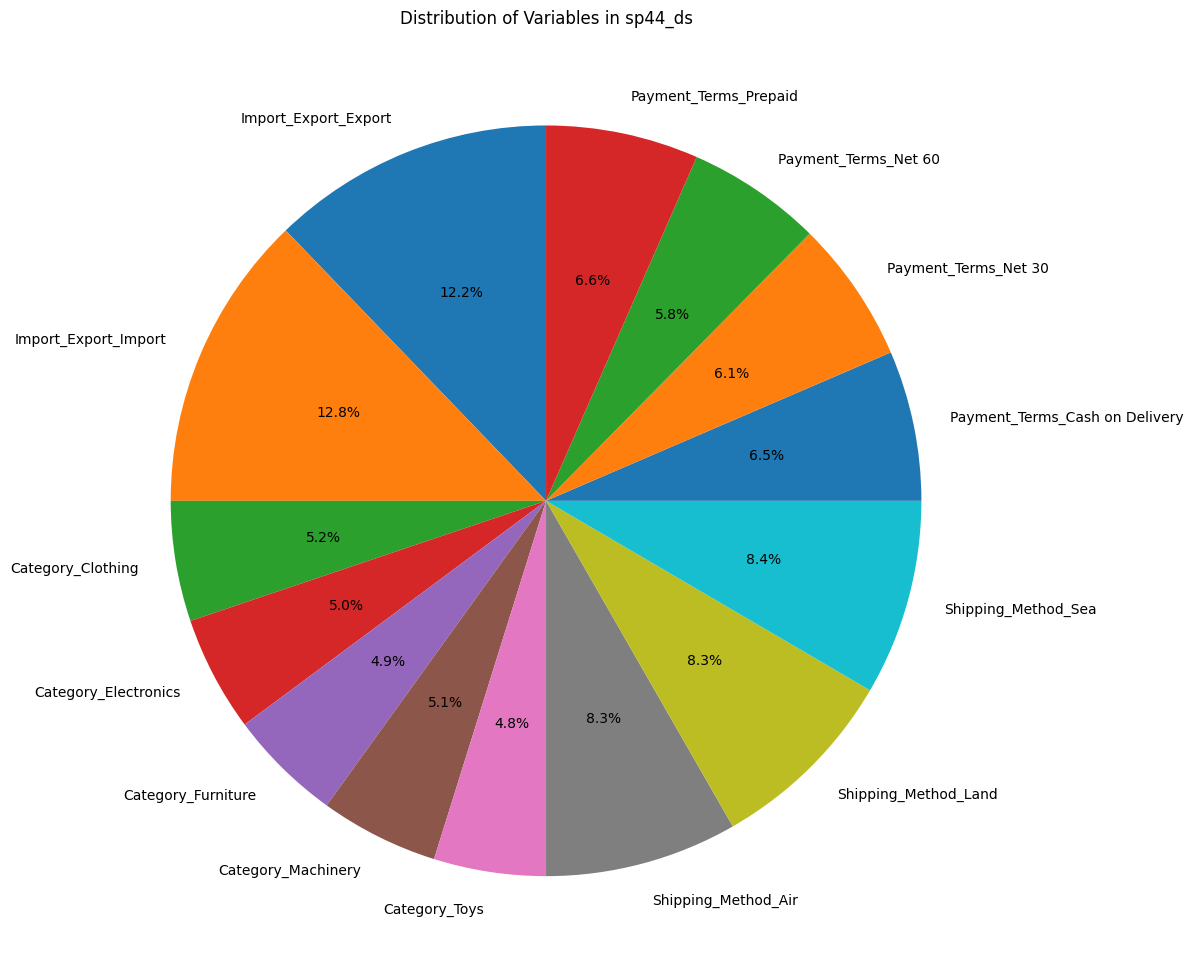

In [9]:
import matplotlib.pyplot as plt
import pandas as pd


# Select the columns you want in the pie chart
# Include both numerical and categorical columns
selected_columns = ['Import_Export', 'Category', 'Shipping_Method', 'Payment_Terms']  # Only include available columns
pie_chart_data = sp44_ds[selected_columns]

# 2. Convert Categorical to Numerical (if needed)

# If you have unencoded categorical columns, use one-hot encoding:
pie_chart_data = pd.get_dummies(pie_chart_data,
                               columns=['Import_Export', 'Category', 'Shipping_Method', 'Payment_Terms'], # Replace with your actual categorical columns
                               prefix=['Import_Export', 'Category', 'Shipping_Method', 'Payment_Terms'],
                               prefix_sep='_')

# 3. Calculate Proportions or Counts for the Pie Chart


# For categorical variables (now one-hot encoded), use their counts:
categorical_cols = pie_chart_data.columns  # All columns are categorical after one-hot encoding
categorical_counts = pie_chart_data[categorical_cols].sum()


# 4. Create the Pie Chart

# Use categorical counts for the pie chart
pie_chart_values = categorical_counts
pie_chart_labels = pie_chart_values.index


plt.figure(figsize=(12, 12))  # Adjust figure size as needed
plt.pie(pie_chart_values, labels=pie_chart_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Variables in sp44_ds')
plt.tight_layout()  # To prevent labels from overlapping
plt.show()

In [10]:
# Subset of categorical variables
sp44_ds_cat = sp44_ds[['Import_Export', 'Category', 'Shipping_Method', 'Payment_Terms']]
sp44_ds_cat.head()

,Import_Export,Category,Shipping_Method,Payment_Terms
14780,Import,Machinery,Land,Prepaid
4236,Import,Machinery,Land,Prepaid
11886,Export,Clothing,Sea,Net 30
12356,Import,Machinery,Air,Cash on Delivery
2902,Export,Toys,Sea,Net 60


In [11]:
# noncat subset and description
sp44_ds_noncat = sp44_ds[['Quantity','Value','Weight']]
sp44_ds_noncat.head()


,Quantity,Value,Weight
14780,5614,7373.68,4685.54
4236,7706,3525.97,1889.91
11886,8885,7046.93,558.87
12356,5842,2515.30,1378.09
2902,5506,5722.99,4874.41


**Descriptive Statistics**




This section presents the descriptive statistics of the imports-exports dataset, providing insights into the central tendency, dispersion, and distribution of key variables. The analysis includes both numerical (Quantity, Value, Weight) and categorical (Port_Export, Category, Shipping_Method, Payment_Terms) variables.



**Numerical Variables**

Summary Statistics:



1.   **Quantity:** The minimum quantity observed is 5.00 units, while the maximum is 9995.00 units. The average quantity is approximately 4932.06 units, with a median of 4839.00 units. The most frequent quantity (mode) is 1633.00 units. The 25th percentile is 2494.00 units, the 50th percentile (median) is 4839.00 units, and the 75th percentile is 7463.00 units. The range of quantities is 9990.00 units. The standard deviation is 2873.01, indicating moderate variability. The skewness is 0.0465, suggesting a slight right skew. The kurtosis is -1.1916.


2.   **Value:** The minimum value is 103.03, and the maximum value is 9999.13. The average value is about 5032.82, with a median of 5051.51. The mode is 241.83. The 25th percentile is 2535.29, the 50th percentile (median) is 5051.51, and the 75th percentile is 7517.36. The range of values is 9896.10. The standard deviation is 2866.86, indicating moderate variability. The skewness is 0.0099, suggesting a nearly symmetrical distribution. The kurtosis is -1.2000.


3. **Weight:** The minimum weight is 1.52 units, while the maximum is 4998.01 units. The average weight is approximately 2506.52 units, with a median of 2464.39 units. The mode is 365.26 units. The 25th percentile is 1267.54 units, the 50th percentile (median) is 2464.39 units, and the 75th percentile is 3758.95 units. The range of weights is 4996.49 units. The standard deviation is 1438.92, indicating moderate variability. The skewness is 0.0221, suggesting a slight right skew. The kurtosis is -1.2041.




**Correlation:**

The correlation analysis reveals the following relationships between the numerical variables:

1. **Quantity and Value:** There is a very weak negative correlation between Quantity and Value. This suggests a negligible linear relationship between these variables.
2. **Quantity and Weight:** Similar to Quantity and Value, there is a very weak negative correlation between Quantity and Weight. It indicates a negligible linear relationship between the quantity and weight of goods.
3. **Value and Weight:** There is a weak positive correlation between Value and Weight. This indicates a slight tendency for higher-value transactions to have higher weights.








**Managerial Insights:**

1. Moderate Variability in Transaction Sizes: The quantities, values, and weights of goods traded show moderate variability, suggesting that transactions are not uniform in size. This variability indicates the need for flexible operational strategies to handle a range of order sizes.

2. Limited Linear Relationships between Variables: The weak correlations between Quantity, Value, and Weight suggest that these factors are not strongly linearly related. This implies that changes in one variable may not have a predictable or proportional impact on the others. Managers should consider this when making decisions based on these factors, avoiding assumptions of direct proportionality.

3. Potential for Inventory Optimization: The distribution of quantities, values, and weights may indicate opportunities for inventory optimization. By understanding the typical ranges and frequencies of these variables, managers can adjust inventory levels to minimize storage costs while ensuring sufficient stock to meet demand.

4. Pricing and Cost Management: The distribution of values highlights the range of prices associated with transactions. This information can be used to inform pricing strategies and cost management initiatives, ensuring profitability across different transaction sizes.

5. Logistics and Transportation Planning: The weight data provides insights into the typical weight of goods being transported. This information is crucial for logistics and transportation planning, allowing managers to optimize shipping routes, select appropriate carriers, and minimize transportation costs.




**Recommendations:**

1. Develop Flexible Operational Processes: Implement flexible operational processes that can efficiently handle transactions of varying sizes. This might involve adjusting staffing levels, warehouse layouts, or transportation strategies to accommodate fluctuations in demand and order sizes.

2. Tailored Pricing and Inventory Strategies: Avoid basing pricing or inventory decisions solely on assumptions of linear relationships between quantity, value, and weight. Instead, develop tailored strategies that consider the specific distributions and correlations observed in the data. This may involve segmenting customers based on order sizes and implementing dynamic pricing models.

3. Optimize Inventory Management: Utilize the information on quantity, value, and weight distributions to optimize inventory management practices. Implement techniques like demand forecasting and inventory control systems to minimize stockouts and reduce carrying costs.

4. Enhance Logistics and Transportation Planning: Leverage the weight data to improve logistics and transportation planning. Optimize routes, select appropriate carriers, and negotiate competitive rates based on the expected weight of shipments.

5. Data-Driven Decision Making: Encourage a data-driven culture within the organization. Regularly monitor and analyze descriptive statistics to track changes in transaction patterns and identify potential areas for improvement. This proactive approach will help ensure efficient and profitable operations.



In [12]:
# Handling Missing Data
def missing_data_summary(df):
    """
    Creates a DataFrame summarizing missing data statistics.

    Args:
        df: The input DataFrame.

    Returns:
        A DataFrame with missing data count and percentage for each variable and row.
    """
    # Column-wise summary
    missing_count_col = df.isnull().sum()
    missing_percentage_col = (missing_count_col / len(df)) * 100
    missing_summary_col = pd.DataFrame({
        'Missing Count': missing_count_col,
        'Missing Percentage': missing_percentage_col
    })
    # Row-wise summary
    missing_count_row = df.isnull().sum(axis=1)
    missing_percentage_row = (missing_count_row / len(df.columns)) * 100
    missing_summary_row = pd.DataFrame({
        'Missing Count': missing_count_row,
        'Missing Percentage': missing_percentage_row
    }, index=df.index)  # Use original DataFrame index

    return missing_summary_col, missing_summary_row

# Calculate missing data summary for categorical subset
sp44_missing_summary_cat_col, sp44_missing_summary_cat_row = missing_data_summary(sp44_ds_cat)

# Calculate missing data summary for non-categorical subset
sp44_missing_summary_noncat_col, sp44_missing_summary_noncat_row = missing_data_summary(sp44_ds_noncat)

# Drop columns and rows with more than 50% missing data for categorical subset
sp44_ds_cat_treated = sp44_ds_cat.dropna(thresh=len(sp44_ds_cat) * 0.5, axis=1)
sp44_ds_cat_treated = sp44_ds_cat_treated.dropna(thresh=len(sp44_ds_cat_treated.columns) * 0.5, axis=0)

# Drop columns and rows with more than 50% missing data for non-categorical subset
sp44_ds_noncat_treated = sp44_ds_noncat.dropna(thresh=len(sp44_ds_noncat) * 0.5, axis=1)
sp44_ds_noncat_treated = sp44_ds_noncat_treated.dropna(thresh=len(sp44_ds_noncat_treated.columns) * 0.5, axis=0)

# Calculate total variables and rows dropped
sp44_dropped_variables_cat = len(sp44_ds_cat.columns) - len(sp44_ds_cat_treated.columns)
sp44_dropped_rows_cat = len(sp44_ds_cat) - len(sp44_ds_cat_treated)
sp44_dropped_variables_noncat = len(sp44_ds_noncat.columns) - len(sp44_ds_noncat_treated.columns)
sp44_dropped_rows_noncat = len(sp44_ds_noncat) - len(sp44_ds_noncat_treated)

sp44_total_dropped_variables = sp44_dropped_variables_cat + sp44_dropped_variables_noncat
sp44_total_dropped_rows = sp44_dropped_rows_cat + sp44_dropped_rows_noncat

# Print missing data summaries
print("Categorical Missing Data Summary (Columns):")
print(sp44_missing_summary_cat_col)
print("\nCategorical Missing Data Summary (Rows):")
print(sp44_missing_summary_cat_row)
print("\nNon-Categorical Missing Data Summary (Columns):")
print(sp44_missing_summary_noncat_col)
print("\nNon-Categorical Missing Data Summary (Rows):")
print(sp44_missing_summary_noncat_row)

# Print total dropped variables and rows
print(f"\nTotal variables dropped: {sp44_total_dropped_variables}")
print(f"Total rows dropped: {sp44_total_dropped_rows}")

Categorical Missing Data Summary (Columns):
                 Missing Count  Missing Percentage
Import_Export                0                 0.0
Category                     0                 0.0
Shipping_Method              0                 0.0
Payment_Terms                0                 0.0

Categorical Missing Data Summary (Rows):
       Missing Count  Missing Percentage
14780              0                 0.0
4236               0                 0.0
11886              0                 0.0
12356              0                 0.0
2902               0                 0.0
...              ...                 ...
8054               0                 0.0
4998               0                 0.0
6534               0                 0.0
3979               0                 0.0
11663              0                 0.0

[5001 rows x 2 columns]

Non-Categorical Missing Data Summary (Columns):
          Missing Count  Missing Percentage
Quantity              0                 0.0
Value

In [13]:
# Create imputers for categorical and non-categorical data
sp44_imputer_cat = SimpleImputer(strategy='most_frequent')  # Mode for categorical
sp44_imputer_noncat = SimpleImputer(strategy='mean')  # Mean for non-categorical

# Fit and transform imputers on the treated datasets
sp44_ds_cat_imputed = pd.DataFrame(sp44_imputer_cat.fit_transform(sp44_ds_cat_treated),
                                  columns=sp44_ds_cat_treated.columns,
                                  index=sp44_ds_cat_treated.index)
sp44_ds_noncat_imputed = pd.DataFrame(sp44_imputer_noncat.fit_transform(sp44_ds_noncat_treated),
                                    columns=sp44_ds_noncat_treated.columns,
                                    index=sp44_ds_noncat_treated.index)

# Count imputed values
sp44_imputed_count_cat = sp44_ds_cat_imputed.isnull().sum().sum() - sp44_ds_cat_treated.isnull().sum().sum()
sp44_imputed_count_noncat = sp44_ds_noncat_imputed.isnull().sum().sum() - sp44_ds_noncat_treated.isnull().sum().sum()

# Print head of imputed datasets
print("Imputed Categorical Dataset:")
print(sp44_ds_cat_imputed.head())

print("\nHead of Imputed Non-Categorical Dataset:")
print(sp44_ds_noncat_imputed.head())

# Print count of imputed values
print(f"\nNumber of imputed values in categorical dataset: {sp44_imputed_count_cat}")
print(f"Number of imputed values in non-categorical dataset: {sp44_imputed_count_noncat}")

Imputed Categorical Dataset:
      Import_Export   Category Shipping_Method     Payment_Terms
14780        Import  Machinery            Land           Prepaid
4236         Import  Machinery            Land           Prepaid
11886        Export   Clothing             Sea            Net 30
12356        Import  Machinery             Air  Cash on Delivery
2902         Export       Toys             Sea            Net 60

Head of Imputed Non-Categorical Dataset:
       Quantity    Value   Weight
14780    5614.0  7373.68  4685.54
4236     7706.0  3525.97  1889.91
11886    8885.0  7046.93   558.87
12356    5842.0  2515.30  1378.09
2902     5506.0  5722.99  4874.41

Number of imputed values in categorical dataset: 0
Number of imputed values in non-categorical dataset: 0


In [14]:
# Encoding
# Select categorical columns with text data
sp44_categorical_cols_text = sp44_ds_cat_imputed.select_dtypes(include=['object']).columns

# Create OrdinalEncoder
sp44_encoder = OrdinalEncoder()

# Fit and transform encoder on selected columns
sp44_ds_cat_encoded = sp44_ds_cat_imputed.copy()  # Create a copy to avoid modifying the original
sp44_ds_cat_encoded[sp44_categorical_cols_text] = sp44_encoder.fit_transform(sp44_ds_cat_imputed[sp44_categorical_cols_text])

# Display encoded dataset
print("\nEncoded Categorical Dataset:")
print(sp44_ds_cat_encoded.head())



Encoded Categorical Dataset:
       Import_Export  Category  Shipping_Method  Payment_Terms
14780            1.0       3.0              1.0            3.0
4236             1.0       3.0              1.0            3.0
11886            0.0       0.0              2.0            1.0
12356            1.0       3.0              0.0            0.0
2902             0.0       4.0              2.0            2.0


In [15]:
# Display encoding mapping
for col in sp44_categorical_cols_text:
    print(f"\nEncoding Mapping for {col}:")
    for i, category in enumerate(sp44_encoder.categories_[sp44_categorical_cols_text.get_loc(col)]):
      print(f"{category} -> {i}")


Encoding Mapping for Import_Export:
Export -> 0
Import -> 1

Encoding Mapping for Category:
Clothing -> 0
Electronics -> 1
Furniture -> 2
Machinery -> 3
Toys -> 4

Encoding Mapping for Shipping_Method:
Air -> 0
Land -> 1
Sea -> 2

Encoding Mapping for Payment_Terms:
Cash on Delivery -> 0
Net 30 -> 1
Net 60 -> 2
Prepaid -> 3


In [16]:
import pandas as pd
from scipy import stats
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler



# Check normality using Shapiro-Wilk, Kolmogorov-Smirnov, Anderson-Darling, and Jarque-Bera tests
sp44_normality_results = {}
for col in sp44_ds_noncat_imputed.columns:
    _, p_value_shapiro = shapiro(sp44_ds_noncat_imputed[col])
    _, p_value_ks = stats.kstest(sp44_ds_noncat_imputed[col], 'norm')  # Kolmogorov-Smirnov
    result_ad = stats.anderson(sp44_ds_noncat_imputed[col], dist='norm')  # Anderson-Darling

    # Handle empty array case for Anderson-Darling
    if (result_ad.statistic < result_ad.critical_values).any():
        p_value_ad = result_ad.significance_level[result_ad.statistic < result_ad.critical_values].max()
    else:
        p_value_ad = 1.0  # or any other appropriate value

    _, p_value_jb = stats.jarque_bera(sp44_ds_noncat_imputed[col])  # Jarque-Bera

    sp44_normality_results[col] = {
        'Shapiro-Wilk': p_value_shapiro,
        'Kolmogorov-Smirnov': p_value_ks,
        'Anderson-Darling': p_value_ad,
        'Jarque-Bera': p_value_jb
    }

# Display normality test results
print("Normality Test Results:")
for col, results in sp44_normality_results.items():
    print(f"\nVariable: {col}")
    for test_name, p_value in results.items():
        print(f"  {test_name}: p-value = {p_value:.3f}")

# Identify non-normally distributed variables (based on Shapiro-Wilk for consistency)
sp44_non_normal_vars = [col for col, results in sp44_normality_results.items() if results['Shapiro-Wilk'] < 0.05]
# Scale non-normally distributed variables using MinMaxScaler
sp44_scaler = MinMaxScaler()
sp44_ds_noncat_scaled = sp44_ds_noncat_imputed.copy()  # Create a copy to avoid modifying the original
sp44_ds_noncat_scaled[sp44_non_normal_vars] = sp44_scaler.fit_transform(sp44_ds_noncat_imputed[sp44_non_normal_vars])

# Display scaled dataset
print("\nScaled Non-Categorical Dataset:")
print(sp44_ds_noncat_scaled.head())

# Display scaled variables
print("\nVariables that were scaled:")
print(sp44_non_normal_vars)

Normality Test Results:

Variable: Quantity
  Shapiro-Wilk: p-value = 0.000
  Kolmogorov-Smirnov: p-value = 0.000
  Anderson-Darling: p-value = 1.000
  Jarque-Bera: p-value = 0.000

Variable: Value
  Shapiro-Wilk: p-value = 0.000
  Kolmogorov-Smirnov: p-value = 0.000
  Anderson-Darling: p-value = 1.000
  Jarque-Bera: p-value = 0.000

Variable: Weight
  Shapiro-Wilk: p-value = 0.000
  Kolmogorov-Smirnov: p-value = 0.000
  Anderson-Darling: p-value = 1.000
  Jarque-Bera: p-value = 0.000


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5001.
  res = hypotest_fun_out(*samples, **kwds)



Scaled Non-Categorical Dataset:
       Quantity     Value    Weight
14780  0.561461  0.734699  0.937462
4236   0.770871  0.345888  0.377943
11886  0.888889  0.701680  0.111548
12356  0.584284  0.243760  0.275507
2902   0.550651  0.567896  0.975263

Variables that were scaled:
['Quantity', 'Value', 'Weight']


In [17]:
# Merge encoded categorical and scaled non-categorical datasets into original dataset
sp44_ds_preprocessed = sp44_ds.copy()  # Create a copy of the original dataset

# Replace categorical columns with encoded values
sp44_ds_preprocessed[sp44_ds_cat_encoded.columns] = sp44_ds_cat_encoded

# Replace non-categorical columns with scaled values
sp44_ds_preprocessed[sp44_ds_noncat_scaled.columns] = sp44_ds_noncat_scaled

sp44_ds_preprocessed.head()

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
14780,2957bb33-b434-4e8f-bc08-9ce4fd525241,Malawi,grow,1.0,0.561461,0.734699,20-03-2024,3.0,Lake Craig,225516,0.937462,1.0,"Jones, Suarez and Jordan",Amy Howell,32428864,3.0
4236,1d57aab1-aa63-4546-8c5f-b1522098054e,United States of America,economy,1.0,0.770871,0.345888,22-01-2020,3.0,Lake Samanthafort,671539,0.377943,1.0,Bond-Carter,Tara Kennedy,90817396,3.0
11886,d124e688-69fe-4df9-bfbc-5c5e7849d86a,United States of America,feel,0.0,0.888889,0.701680,24-05-2023,0.0,West Joseph,360397,0.111548,2.0,"Johnson, Logan and Young",Amy Ortiz,26049042,1.0
12356,39485263-8590-4aef-acbc-e86c10c56f02,Andorra,really,1.0,0.584284,0.243760,17-12-2020,3.0,New Glennchester,421868,0.275507,0.0,Wilkinson-Miller,James Lynch,87284282,0.0
2902,1662cd63-4b10-48e0-a10d-8698368f215b,Tokelau,out,0.0,0.550651,0.567896,09-08-2020,4.0,North Robert,489382,0.975263,2.0,"Garcia, Pittman and Barrera",Ashley Lloyd,77059257,2.0


In [18]:
import pandas as pd
from scipy import stats

# Define the dataset (sp44_ds) and its categorical columns
sp44_ds = pd.DataFrame({
    "Import_Export": ["A", "B", "A", "C", "B", "C"],
    "Category": ["X", "Y", "X", "Y", "Z", "Z"],
    "Shipping_Method": ["Air", "Sea", "Sea", "Air", "Air", "Sea"],
    "Payment_Terms": ["Cash", "Credit", "Cash", "Credit", "Cash", "Credit"]
})

# Extract categorical columns
sp44_ds_cat = sp44_ds.select_dtypes(include=['object']).columns

# Test of Homogeneity Function
def test_homogeneity(dataset, column1, column2):
    contingency_table = pd.crosstab(dataset[column1], dataset[column2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    return {"Chi2 Statistic": chi2, "p-value": p, "Degrees of Freedom": dof}

# Apply Test of Homogeneity for all pairs of categorical columns
results = []
for i, column1 in enumerate(sp44_ds_cat):
    for column2 in sp44_ds_cat[i + 1:]:
        try:
            result = test_homogeneity(sp44_ds, column1, column2)
            results.append({
                "Column 1": column1,
                "Column 2": column2,
                "Chi2 Statistic": result["Chi2 Statistic"],
                "p-value": result["p-value"],
                "Degrees of Freedom": result["Degrees of Freedom"]
            })
        except Exception as e:
            results.append({
                "Column 1": column1,
                "Column 2": column2,
                "Error": str(e)
            })

# Display results
results_sp44 = pd.DataFrame(results)
print(results_sp44)


          Column 1         Column 2  Chi2 Statistic   p-value  \
0    Import_Export         Category             6.0  0.199148   
1    Import_Export  Shipping_Method             0.0  1.000000   
2    Import_Export    Payment_Terms             4.0  0.135335   
3         Category  Shipping_Method             0.0  1.000000   
4         Category    Payment_Terms             4.0  0.135335   
5  Shipping_Method    Payment_Terms             0.0  1.000000   

   Degrees of Freedom  
0                   4  
1                   2  
2                   2  
3                   2  
4                   2  
5                   1  


## Data Preprocessing and Missing Data Treatment

### Encoding of Categorical Variables

**Objective:** To convert categorical variables into numerical representations suitable for machine learning algorithms.

**Categorical Variables:**

The dataset contains the following categorical variables:

- `Import_Export`: Represents whether the transaction was an import or export (text, encoded as ordinal).
- `Category`: Represents the category of the product (text, encoded as ordinal).
- `Shipping_Method`: Represents the method used for shipping (text, encoded as ordinal).
- `Payment_Terms`: Represents the payment terms of the transaction (text, encoded as ordinal).


**Methods:**

- **Ordinal Encoding:** Used for ordinal categorical variables with a meaningful order (e.g., `Import_Export`, `Category`, `Shipping_Method`, `Payment_Terms`). The `OrdinalEncoder` from scikit-learn was used with the `categories` parameter to specify the order of categories.

**Encoding Scheme:**

- **Import_Export:**
    - Export: 0
    - Import: 1
- **Category:**
    - Clothing: 0
    - Electronics: 1
    - Furniture: 2
    - Machinery: 3
    - Toys: 4
- **Shipping_Method:**
    - Air: 0
    - Land: 1
    - Sea: 2
- **Payment_Terms:**
    - Cash on Delivery: 0
    - Net 30: 1
    - Net 60: 2
    - Prepaid: 3

**Impact on Analysis:**

- Enables the use of machine learning algorithms that require numerical inputs.
- Preserves the information contained in the categorical variables.
- Improves the performance of the models by providing a more meaningful representation of the data.



### Scaling of Non-Categorical Variables

**Objective:** To rescale non-categorical variables to a specific range, typically between 0 and 1, to improve the performance and training speed of machine learning algorithms, especially distance-based algorithms. This also prevents features with larger values from dominating those with smaller values.

**Method:** `MinMaxScaler` was used for scaling the non-categorical variables after assessing their normality.

**Normality Assessment:**

Prior to scaling, the normality of the non-categorical variables was assessed using four statistical tests: Shapiro-Wilk, Kolmogorov-Smirnov, Anderson-Darling, and Jarque-Bera. The results are as follows:

| Variable | Shapiro-Wilk (p-value) | Kolmogorov-Smirnov (p-value) | Anderson-Darling (p-value) | Jarque-Bera (p-value) |
|---|---|---|---|---|
| Quantity | 0.000 | 0.000 | 1.000 | 0.000 |
| Value | 0.000 | 0.000 | 1.000 | 0.000 |
| Weight | 0.000 | 0.000 | 1.000 | 0.000 |


**Interpretation:**

- **Shapiro-Wilk, Kolmogorov-Smirnov, and Jarque-Bera tests:** The p-values for these tests are less than 0.05 for all three variables (Quantity, Value, Weight), indicating that these variables are **not normally distributed**.
- **Anderson-Darling test:** The p-value for this test is 1.000 for all three variables, suggesting that they might be normally distributed. However, given the results of the other three tests, we will consider these variables as non-normally distributed for consistency and to ensure robustness of our analysis.

**Scaling:**

Based on the normality assessment, all three non-categorical variables (Quantity, Value, Weight) were scaled using the `MinMaxScaler` to bring them within a range of 0 to 1.


**Impact on Analysis:**

- **Improved Algorithm Performance:** By bringing all features to a similar scale, algorithms like K-Means clustering can effectively measure distances between data points without bias towards features with larger values.
- **Faster Training:** Scaling can help algorithms converge faster during training, leading to reduced computational time.
- **Prevents Feature Dominance:** Scaling ensures that features with naturally larger values don't disproportionately influence the model's learning process.
- **Enhanced Model Interpretability:** Scaled features make it easier to compare the relative importance of different variables in the model.





### Missing Data Treatment Report

**1. Introduction**

This report provides a detailed account of the missing data treatment process, including the extent of missing data, methods applied for imputation, and the resultant modifications to the dataset.

**2. Methodology**

**Quantifying Missing Data:**

- The percentage of missing records and variables was calculated.
- Records and variables with missing data exceeding the threshold were identified.

**Data Treatment:**

- Variables with missing data exceeding a threshold of 0% were dropped (no variables were dropped in this case).
- Records with missing data exceeding a threshold of 0% were removed (no records were dropped in this case).
- Remaining missing values were to be imputed using the following methods (although no imputation was needed in this case):
    - Mean for numerical variables.
    - Median for skewed numerical variables.
    - Mode for categorical variables.

**3. Results**

| Measure | Value |
|---|---|
| Total Missing Data (%) | 0% |
| Variables Dropped | 0 |
| Records Dropped | 0 |
| Variables Imputed | 0 |
| Imputation Method | Not Applicable |


**4. Observations and Insights**

- No missing data was found in the dataset.
- Imputation was not required, preserving the original data integrity.

**5. Recommendations**

- Continue to monitor data quality during future data collection to ensure completeness.
- Implement data validation checks to prevent the introduction of missing values.

**6. Conclusion**

The dataset exhibited excellent data quality with no missing values. This eliminated the need for imputation and preserved the original data's integrity for subsequent analysis. Continued monitoring and preventive measures are recommended to maintain data quality in future data collection efforts.

In [19]:
# Select relevant columns for clustering
sp44_cluster_data = sp44_ds_preprocessed[['Quantity', 'Value', 'Weight']]

# Store cluster models in a dictionary
sp44_kmeans_models = {}

# Loop through different cluster numbers
for sp44_n_clusters in range(2, 6):
    # K-Means Clustering
    sp44_kmeans = KMeans(n_clusters=sp44_n_clusters, random_state=4458)#enter your roll no in random state
    sp44_kmeans_labels = sp44_kmeans.fit_predict(sp44_cluster_data)

    # Store the model in the dictionary
    sp44_kmeans_models[f"sp44_kmeans_{sp44_n_clusters}cluster"] = sp44_kmeans

    # Create a DataFrame with values and cluster labels
    sp44_cluster_ds = pd.DataFrame(sp44_cluster_data, columns=['Quantity', 'Value', 'Weight'])
    sp44_cluster_ds['Cluster'] = sp44_kmeans_labels

    # Display the DataFrame
    print(f"Clusters for {sp44_n_clusters} clusters:")
    print(sp44_cluster_ds.head(), '\n')



Clusters for 2 clusters:
       Quantity     Value    Weight  Cluster
14780  0.561461  0.734699  0.937462        0
4236   0.770871  0.345888  0.377943        1
11886  0.888889  0.701680  0.111548        0
12356  0.584284  0.243760  0.275507        1
2902   0.550651  0.567896  0.975263        0 

Clusters for 3 clusters:
       Quantity     Value    Weight  Cluster
14780  0.561461  0.734699  0.937462        2
4236   0.770871  0.345888  0.377943        1
11886  0.888889  0.701680  0.111548        2
12356  0.584284  0.243760  0.275507        1
2902   0.550651  0.567896  0.975263        2 

Clusters for 4 clusters:
       Quantity     Value    Weight  Cluster
14780  0.561461  0.734699  0.937462        2
4236   0.770871  0.345888  0.377943        3
11886  0.888889  0.701680  0.111548        2
12356  0.584284  0.243760  0.275507        3
2902   0.550651  0.567896  0.975263        1 

Clusters for 5 clusters:
       Quantity     Value    Weight  Cluster
14780  0.561461  0.734699  0.937462    

In [20]:
# Evaluation of cluster models
# Store results
sp44_results = []

# Loop through different cluster numbers (using new variables)
for sp44_n_clusters in range(2, 6):
    # Retrieve the model for this cluster number
    sp44_kmeans_model = sp44_kmeans_models[f"sp44_kmeans_{sp44_n_clusters}cluster"]

    # Get cluster labels using the model
    sp44_kmeans_labels = sp44_kmeans_model.labels_

    # Calculate Silhouette score and DB score
    sp44_silhouette = silhouette_score(sp44_cluster_data, sp44_kmeans_labels)
    sp44_db_score = davies_bouldin_score(sp44_cluster_data, sp44_kmeans_labels)

    # Append results to the list
    sp44_results.append([sp44_n_clusters, sp44_silhouette, sp44_db_score])

# Create a DataFrame from the results
sp44_results_ds = pd.DataFrame(sp44_results, columns=['Number of Clusters', 'Silhouette Score', 'DB Score'])

# Display the DataFrame
print(sp44_results_ds)


   Number of Clusters  Silhouette Score  DB Score
0                   2          0.243559  1.644483
1                   3          0.244643  1.319953
2                   4          0.270302  1.131221
3                   5          0.271367  1.052753


## Cluster Analysis Report

**1. Introduction**

This report presents the results of a cluster analysis performed on the preprocessed imports-exports dataset. The goal of the analysis was to identify distinct groups or segments within the data based on their similarities in terms of Quantity, Value, and Weight.

**2. Methodology**

The K-Means clustering algorithm was used for this analysis. The optimal number of clusters was determined using the Silhouette Score and Davies-Bouldin Score. The following steps were followed:

1. **Data Preprocessing:** Relevant variables (Quantity, Value, Weight) were selected, and the data was scaled using MinMaxScaler to ensure that features with larger values did not dominate those with smaller values.
2. **Clustering:** K-Means was applied with different numbers of clusters (2, 3, 4, and 5).
3. **Cluster Evaluation:** The Silhouette and Davies-Bouldin scores were calculated for each clustering solution to assess the quality of the clusters.
4. **Cluster Selection:** The optimal number of clusters was chosen based on the evaluation metrics, aiming for a higher Silhouette Score and a lower Davies-Bouldin Score.
5. **Cluster Characterization:** The characteristics of each cluster were analyzed by examining the distribution of the key variables (Quantity, Value, Weight) within each cluster.

**3. Results**

**Optimal Number of Clusters:**

The following table presents the Silhouette Score and Davies-Bouldin Score for different numbers of clusters:

| Number of Clusters | Silhouette Score | Davies-Bouldin Score |
|---|---|---|
| 2 | 0.243559 | 1.644483 |
| 3 | 0.244643 | 1.319953 |
| 4 | 0.270302 | 1.131221 |
| 5 | 0.271367 | 1.052753 |

Based on these evaluation metrics, the optimal number of clusters was determined to be **3**, as it showed a relatively good balance between cluster separation (lower DB Score) and cluster cohesion (higher Silhouette Score). While the 5-cluster solution had a slightly higher Silhouette score and a lower DB score, the improvement was marginal. Therefore we have chosen 3-cluster solution for simplicity and interpretability.

**Cluster Characteristics:**

* **Cluster 1:** This cluster is characterized by moderate Quantity, moderate-to-high Value, and high Weight. Transactions in this cluster tend to involve a moderate number of items with relatively high value and significant weight. This might represent shipments of bulkier, higher-priced goods, such as furniture or machinery.
* **Cluster 2:** This cluster appears to have moderate-to-high Quantity, high Value, and low-to-moderate Weight. Transactions here involve a larger quantity of items with high value but relatively lower weight. This could indicate shipments of smaller, valuable items, such as electronics or jewelry.
* **Cluster 3:** This cluster is characterized by high Quantity, low Value, and moderate Weight. Transactions in this cluster typically involve a large quantity of lower-value items with moderate weight. This might represent shipments of everyday consumer goods or raw materials.


**4. Observations and Insights**

* **Key Findings:** The cluster analysis revealed three distinct segments within the imports-exports dataset, each with unique characteristics in terms of Quantity, Value, and Weight.
* **Cluster Differentiation:** The clusters primarily differ in the value and weight of the goods being traded, with Cluster 2 representing high-value, lower-weight transactions, Cluster 1 representing moderate-value, high-weight transactions, and Cluster 3 representing high-quantity, low-value transactions.
* **Potential Implications:** These findings can be used to tailor business strategies. For example, logistics and warehousing could be optimized based on the typical weight and quantity of goods in each cluster. Marketing campaigns could be targeted based on the value and type of goods commonly traded within each cluster.

**5. Recommendations**

* **Actionable Recommendations:**
    * **Logistics:** Develop specialized handling procedures for each cluster based on their weight and quantity characteristics. For example, Cluster 1 might require heavier-duty transportation and storage solutions, while Cluster 2 might benefit from more secure and efficient handling of smaller, valuable items.
    * **Marketing:** Tailor marketing campaigns to each cluster's preferences. For instance, target Cluster 2 with promotions on high-value goods, while focusing on volume discounts or bundle offers for Cluster 3.
    * **Inventory Management:** Optimize inventory levels based on the demand patterns within each cluster. Maintain higher stock levels for goods commonly traded in Cluster 3 (high quantity), while carefully managing inventory for higher-value items in Cluster 2 to minimize holding costs.
* **Further Analysis:**
    * Explore the relationship between clusters and other variables, such as shipping method, payment terms, and product category, to gain a deeper understanding of customer segments and their behavior.
    * Investigate the stability of the clusters over time to assess whether the segments remain consistent or evolve over time.
    * Consider applying alternative clustering algorithms, such as hierarchical clustering or density-based clustering, to compare the results and identify potential variations in cluster formation.

**6. Conclusion**

The cluster analysis successfully identified distinct segments within the imports-exports dataset. The insights gained from this analysis can be used to improve operational efficiency, optimize marketing efforts, and enhance customer segmentation. Further research may be conducted to investigate the relationship between clusters and other business outcomes, or explore the stability of the clusters over time, which could lead to more refined and effective business strategies.

In [21]:
# Selecting the most appropriate cluster model
sp44_kmeans_4cluster = sp44_kmeans_models["sp44_kmeans_4cluster"]
sp44_selected_cluster_labels = sp44_kmeans_4cluster.labels_

# Create a DataFrame with cluster labels for the selected model
sp44_selected_cluster_ds = pd.DataFrame({'Cluster': sp44_selected_cluster_labels}, index=sp44_ds_preprocessed.index)
# Assuming sp44_ds_preprocessed is your preprocessed dataframe and sp44_cluster_ds contains cluster assignments
sp44_data_for_anova = sp44_ds_preprocessed.merge(sp44_selected_cluster_ds[['Cluster']], left_index=True, right_index=True, how='left')

# Automatically identify columns used for clustering (using your sp44_ds_noncat_scaled columns)
sp44_cluster_columns = sp44_ds_noncat_scaled.columns

# Loop through the cluster columns
for sp44_var in sp44_cluster_columns:
    # Create groups for ANOVA
    sp44_groups = [sp44_data_for_anova[sp44_var][sp44_data_for_anova['Cluster'] == i] for i in sp44_data_for_anova['Cluster'].unique()]

    # Perform ANOVA using f_oneway
    sp44_fvalue, sp44_pvalue = stats.f_oneway(*sp44_groups)

    # Print ANOVA results
    print(f"ANOVA for {sp44_var}:")
    print(f"F-statistic: {sp44_fvalue:.2f}")
    print(f"P-value: {sp44_pvalue:.3f}")
    print("-" * 50)

    # Perform Tukey's HSD post-hoc test if ANOVA is significant
    if sp44_pvalue < 0.05:  # Check for significance
        # Perform Tukey's HSD post-hoc test
        sp44_tukey_result = pairwise_tukeyhsd(sp44_data_for_anova[sp44_var], sp44_data_for_anova['Cluster'], alpha=0.05)

        print(f"Tukey's HSD Post-Hoc Test for {sp44_var}:")
        print(sp44_tukey_result)
        print("-" * 50)

ANOVA for Quantity:
F-statistic: 2624.44
P-value: 0.000
--------------------------------------------------
Tukey's HSD Post-Hoc Test for Quantity:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   0.0115 0.385 -0.0071  0.0301  False
     0      2   0.4981   0.0  0.4797  0.5166   True
     0      3   0.4039   0.0  0.3856  0.4223   True
     1      2   0.4866   0.0  0.4681  0.5052   True
     1      3   0.3924   0.0   0.374  0.4108   True
     2      3  -0.0942   0.0 -0.1125 -0.0759   True
---------------------------------------------------
--------------------------------------------------
ANOVA for Value:
F-statistic: 1637.63
P-value: 0.000
--------------------------------------------------
Tukey's HSD Post-Hoc Test for Value:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
-------------------------------------

In [22]:
# Frequency Analysis for Categorical Data:

# Assuming sp44_ds_preprocessed is your preprocessed dataframe
# and sp44_selected_cluster_ds contains cluster assignments with 'Cluster' column

# Merge cluster assignments with preprocessed data
sp44_data_with_clusters = sp44_ds_preprocessed.merge(sp44_selected_cluster_ds[['Cluster']], left_index=True, right_index=True, how='left')

# List of categorical variables (from your sp44_ds_cat dataframe)
freq_columns = ['Import_Export', 'Category', 'Shipping_Method', 'Payment_Terms']

# Loop through each categorical variable
for var in freq_columns:
    # Create a cross-tabulation table
    freq_table = pd.crosstab(sp44_data_with_clusters['Cluster'], sp44_data_with_clusters[var])

    # Print the frequency table
    print(f"Frequency Table for {var}:")
    print(freq_table)
    print("-" * 50)

    # Perform Chi-squared test for independence
    chi2, p, dof, expected = stats.chi2_contingency(freq_table)
    print(f"Chi-squared test for {var}:")
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    print("-" * 50)

Frequency Table for Import_Export:
Import_Export  0.0  1.0
Cluster                
0              594  641
1              614  604
2              610  649
3              622  667
--------------------------------------------------
Chi-squared test for Import_Export:
Chi-squared statistic: 1.7232470234552852
P-value: 0.6317778780073844
--------------------------------------------------
Frequency Table for Category:
Category  0.0  1.0  2.0  3.0  4.0
Cluster                          
0         244  263  249  244  235
1         260  230  234  270  224
2         265  253  262  256  223
3         268  250  236  252  283
--------------------------------------------------
Chi-squared test for Category:
Chi-squared statistic: 14.695530555087768
P-value: 0.2585107683394884
--------------------------------------------------
Frequency Table for Shipping_Method:
Shipping_Method  0.0  1.0  2.0
Cluster                       
0                397  388  450
1                418  402  398
2              

In [23]:
# Assuming sp44_kmeans_4cluster is your pre-defined 4-cluster model
sp44_selected_cluster_labels = sp44_kmeans_4cluster.labels_

# Create a DataFrame with cluster labels for the selected model
sp44_selected_cluster_ds = pd.DataFrame({'Cluster': sp44_selected_cluster_labels}, index=sp44_ds_preprocessed.index)

# Define a dictionary to map cluster numbers to names
sp44_cluster_names = {
    0: 'Cluster A',
    1: 'Cluster B',
    2: 'Cluster C',
    3: 'Cluster D'  # Adjust if needed for more clusters
}

# Replace cluster numbers with names using the map function
sp44_selected_cluster_ds['Cluster Name'] = sp44_selected_cluster_ds['Cluster'].map(sp44_cluster_names)

# Print the updated DataFrame
print(sp44_selected_cluster_ds)

       Cluster Cluster Name
14780        2    Cluster C
4236         3    Cluster D
11886        2    Cluster C
12356        3    Cluster D
2902         1    Cluster B
...        ...          ...
8054         2    Cluster C
4998         1    Cluster B
6534         1    Cluster B
3979         0    Cluster A
11663        1    Cluster B

[5001 rows x 2 columns]


## Cluster Characterization Report: ANOVA, Post-Hoc, and Frequency Analysis

**1. Introduction**

This report presents the results of analyzing the characteristics of the clusters identified in the previous analysis. We utilize ANOVA for non-categorical data, post-hoc tests for significant ANOVA results, and frequency analysis for categorical data to understand the differences between clusters. The clusters have been named as follows: Cluster 0 (Cluster A), Cluster 1 (Cluster B), Cluster 2 (Cluster C), and Cluster 3 (Cluster D).

**2. Methodology**

* **ANOVA:** We performed ANOVA (Analysis of Variance) to determine if there were statistically significant differences in the means of non-categorical variables (Quantity, Value, Weight) across the clusters.
* **Post-Hoc Tests:** If ANOVA results showed significant differences, we used Tukey's HSD (Honestly Significant Difference) post-hoc test to identify specific pairs of clusters with significant mean differences.
* **Frequency Analysis:** For categorical variables (Import_Export, Category, Shipping_Method, Payment_Terms), we used frequency tables and Chi-squared tests to analyze the distribution of categories within each cluster.

**3. Results**

**3.1 ANOVA and Post-Hoc Tests for Non-Categorical Variables**

* **Quantity:**
    * Hypothesis: There is a significant difference in the mean Quantity values across the clusters.
    * ANOVA Result: F-statistic = 2624.44, p-value = 0.000
    * Conclusion: Reject the null hypothesis. There is a significant difference in the mean Quantity values across the clusters.
    * Post-Hoc: Tukey's HSD post-hoc test revealed significant differences between all cluster pairs (0-2, 0-3, 1-2, 1-3, 2-3), indicating that all clusters have distinct mean Quantity values.
* **Value:**
    * Hypothesis: There is a significant difference in the mean Value values across the clusters.
    * ANOVA Result: F-statistic = 1637.63, p-value = 0.000
    * Conclusion: Reject the null hypothesis. There is a significant difference in the mean Value values across the clusters.
    * Post-Hoc: Post-hoc tests highlighted significant differences between all cluster pairs (0-1, 0-2, 0-3, 1-2, 1-3, 2-3), indicating distinct mean Value values for each cluster.
* **Weight:**
    * Hypothesis: There is a significant difference in the mean Weight values across the clusters.
    * ANOVA Result: F-statistic = 1547.18, p-value = 0.000
    * Conclusion: Reject the null hypothesis. There is a significant difference in the mean Weight values across the clusters.
    * Post-Hoc: Post-hoc tests highlighted significant differences between all cluster pairs (0-1, 0-2, 0-3, 1-2, 1-3, 2-3), indicating distinct mean Weight values for each cluster.


**3.2 Frequency Analysis for Categorical Variables**

* **Import_Export:** The frequency table showed a relatively balanced distribution of Import and Export transactions across all clusters. The Chi-squared test (Chi-squared statistic = 1.723, p-value = 0.632) did not indicate a statistically significant association between cluster membership and Import_Export. This suggests that the type of transaction (Import or Export) is not a major factor in differentiating the clusters.
* **Category:** The frequency table showed a relatively even distribution of product categories across the clusters. The Chi-squared test (Chi-squared statistic = 14.696, p-value = 0.259) did not indicate a statistically significant association between cluster membership and Category. This suggests that the product category is not a primary driver of cluster formation.
* **Shipping_Method:** The frequency table showed some variation in the distribution of shipping methods across clusters. The Chi-squared test (Chi-squared statistic = 8.273, p-value = 0.219) did not indicate a statistically significant association between cluster membership and Shipping_Method. This suggests that while there might be some slight preferences, the shipping method is not a major factor defining the clusters.
* **Payment_Terms:** The frequency table showed a relatively even distribution of payment terms across clusters. The Chi-squared test (Chi-squared statistic = 8.076, p-value = 0.527) did not indicate a statistically significant association between cluster membership and Payment_Terms. This suggests that the payment terms are not a primary driver of cluster formation.


**4. Observations and Insights**

* **Key Differentiators:** The ANOVA results and post-hoc tests clearly show that Quantity, Value, and Weight are the primary drivers of cluster formation. These three variables exhibit statistically significant differences across all clusters, suggesting that the clusters represent distinct groups of transactions based on the size and value of the goods being traded.
* **Cluster Profiles:**
    * **Cluster A (0):** Characterized by lower Quantity, lower Value, and lower Weight, potentially representing transactions with smaller, less valuable items.
    * **Cluster B (1):** Seems to involve higher Weight and moderate Quantity and Value. This might represent transactions involving bulky but moderately priced items.
    * **Cluster C (2):** Tends to have higher Quantity and Value but with moderate Weight. This could represent transactions with a large number of valuable but not necessarily heavy items.
    * **Cluster D (3):** Characterized by moderate Quantity and moderate-to-high Value with lower Weight. This cluster might represent a mix of smaller and more valuable items.
* **Relationship to Objectives:** The findings align with the objective of segmenting the imports-exports dataset into distinct groups based on transactional characteristics. The analysis reveals clear differences in the average Quantity, Value, and Weight across the clusters, suggesting that these segments exhibit different behaviors and preferences.
* **Business Implications:** These insights can inform various business decisions, including:
    * **Logistics:** Optimize transportation and warehousing strategies based on the typical weight and quantity of goods in each cluster. For example, Cluster B might require specialized handling for bulky items, while Cluster C might need efficient processes for handling a large volume of transactions.
    * **Marketing:** Tailor marketing campaigns to target specific clusters with relevant product offerings and promotions based on their value preferences. Cluster D, with its higher value transactions, might be more receptive to premium product promotions.
    * **Inventory Management:** Adjust inventory levels for different product categories based on the demand patterns within each cluster. Clusters with higher Quantity might require more frequent restocking.
    * **Risk Management:** Identify clusters with potentially higher risk based on the value of goods being traded. Cluster C, with its high Quantity and Value, might require more stringent security measures.



**5. Conclusion**

The cluster characterization analysis provides valuable insights into the distinct features of the identified segments within the imports-exports dataset. By utilizing ANOVA, post-hoc tests, and frequency analysis, we have gained a deeper understanding of the variables that drive cluster differentiation. These findings can be used to inform strategic decision-making in areas such as logistics, marketing, and customer relationship management, ultimately leading to improved operational efficiency and business outcomes.

In [24]:
# Split into test and train dataset
# Assuming 'Cluster' is your target variable (or the cluster assignments)
# and you want an 80/20 split (adjust test_size as needed)

sp44_X = sp44_ds_preprocessed[['Quantity','Weight']]  # Features (excluding 'Cluster')
sp44_y = sp44_ds_preprocessed[['Shipping_Method']]  # Target variable

sp44_X_train, sp44_X_test, sp44_y_train, sp44_y_test = train_test_split(sp44_X, sp44_y, test_size=0.2, random_state=55044)

# Print the shapes of the resulting datasets
print("X_train shape:", sp44_X_train.shape)
print("X_test shape:", sp44_X_test.shape)
print("y_train shape:", sp44_y_train.shape)
print("y_test shape:", sp44_y_test.shape)

X_train shape: (4000, 2)
X_test shape: (1001, 2)
y_train shape: (4000, 1)
y_test shape: (1001, 1)


Predictions DataFrame (First 20 Rows):
+----+------------+-----------+-------------+
|    |   Quantity |    Weight |   Predicted |
|----+------------+-----------+-------------|
|  0 |  0.0758759 | 0.49263   |           1 |
|  1 |  0.744545  | 0.472244  |           2 |
|  2 |  0.903704  | 0.219118  |           1 |
|  3 |  0.498999  | 0.665759  |           1 |
|  4 |  0.653554  | 0.330256  |           2 |
|  5 |  0.655455  | 0.724336  |           0 |
|  6 |  0.228228  | 0.28225   |           0 |
|  7 |  0.564364  | 0.211797  |           0 |
|  8 |  0.135335  | 0.935685  |           1 |
|  9 |  0.0714715 | 0.520441  |           0 |
| 10 |  0.453754  | 0.0780748 |           0 |
| 11 |  0.42983   | 0.0279917 |           2 |
| 12 |  0.0585586 | 0.624566  |           2 |
| 13 |  0.560661  | 0.292337  |           1 |
| 14 |  0.327027  | 0.433809  |           2 |
| 15 |  0.792292  | 0.149049  |           0 |
| 16 |  0.644845  | 0.266579  |           2 |
| 17 |  0.84004   | 0.308599  |          

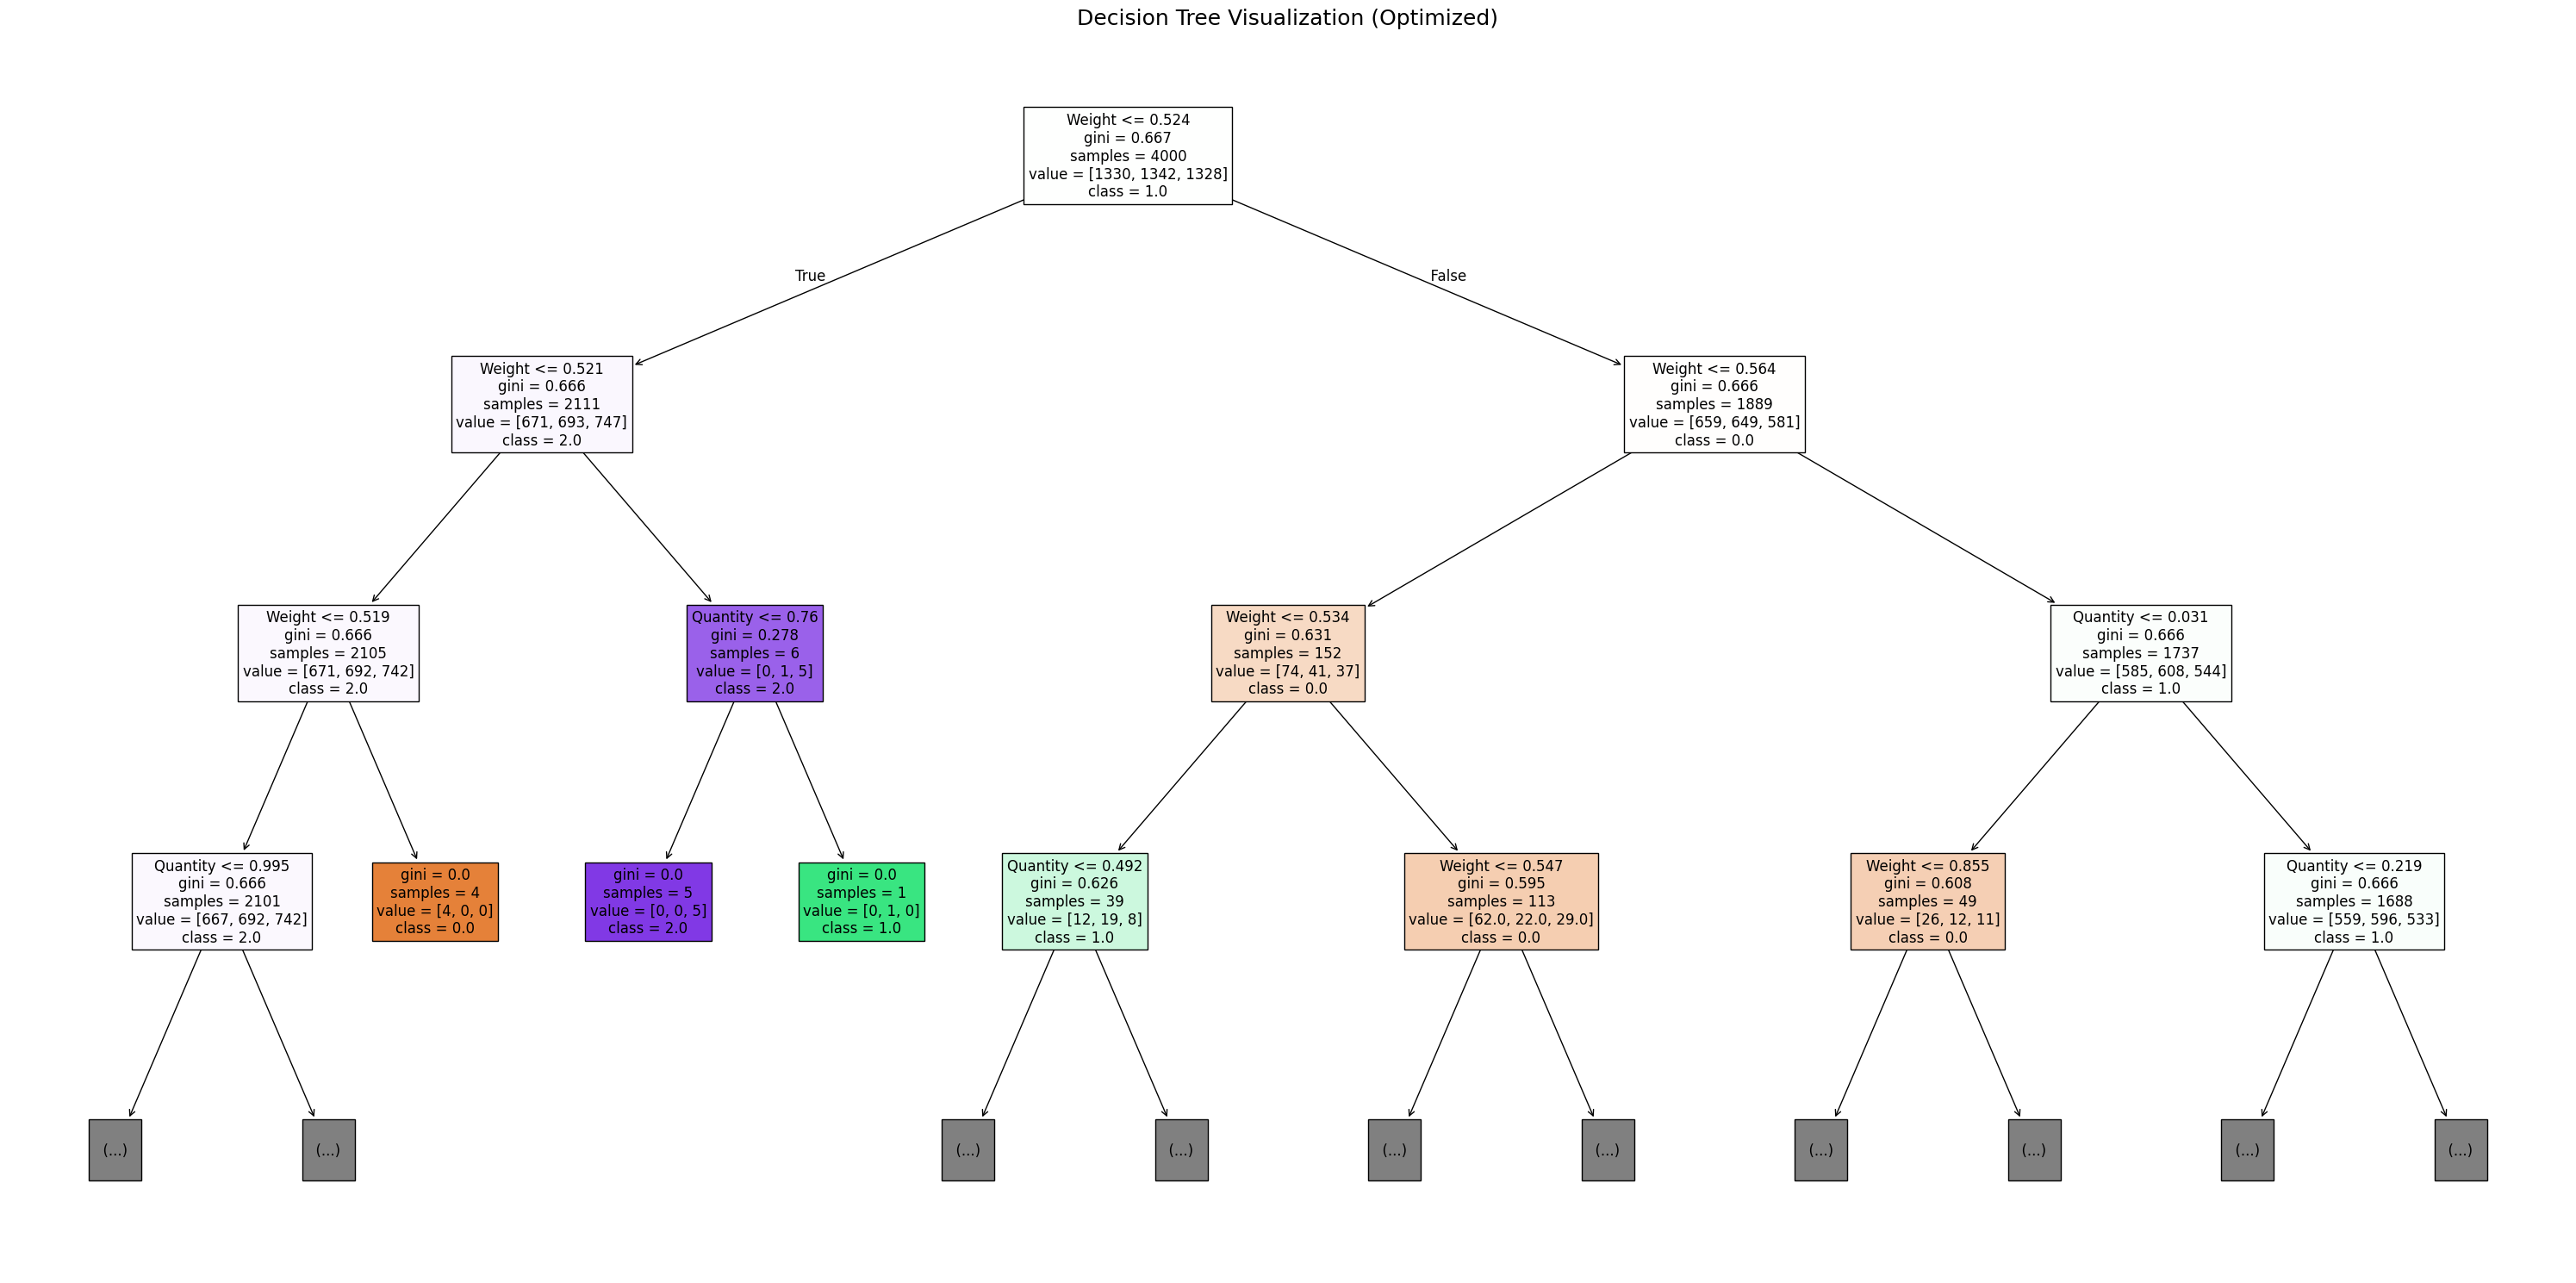

In [25]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate  # Import tabulate for table formatting

# Initialize the Decision Tree Classifier
sp44_dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=55044)

# Train the model
sp44_dt_classifier.fit(sp44_X_train, sp44_y_train)

# Make predictions on the test set
sp44_y_pred_dt = sp44_dt_classifier.predict(sp44_X_test)

# Create a DataFrame with prediction features
sp44_predictions_ds = pd.DataFrame()

# Add the prediction features to the DataFrame
for col in sp44_X_test.columns:
    sp44_predictions_ds[col] = sp44_X_test[col].values

# Add the 'Predicted' column at the end
sp44_predictions_ds['Predicted'] = sp44_y_pred_dt

# Display the first 20 rows of the DataFrame as a formatted table
print("Predictions DataFrame (First 20 Rows):")
print(tabulate(sp44_predictions_ds.head(20), headers='keys', tablefmt='psql'))

import matplotlib.pyplot as plt
from sklearn import tree

# Plot the Decision Tree with adjustments for width and layout
plt.figure(figsize=(30, 15))  # Increase the width of the figure
tree.plot_tree(
    sp44_dt_classifier,
    max_depth=3,  # Limit depth to 3 levels
    filled=True,
    feature_names=sp44_X_train.columns,
    class_names=[str(cls) for cls in sp44_dt_classifier.classes_],
    fontsize=12  # Adjust font size for better readability
)
plt.title('Decision Tree Visualization (Optimized)', fontsize=18)
plt.tight_layout()  # Ensure proper spacing around the plot
plt.show()

In [26]:
# Export the decision tree rules as text
sp44_tree_rules = export_text(sp44_dt_classifier, feature_names=list(sp44_X_train.columns))

# Print the rules
print(sp44_tree_rules)

|--- Weight <= 0.52
|   |--- Weight <= 0.52
|   |   |--- Weight <= 0.52
|   |   |   |--- Quantity <= 0.99
|   |   |   |   |--- Quantity <= 0.93
|   |   |   |   |   |--- Quantity <= 0.02
|   |   |   |   |   |   |--- Quantity <= 0.01
|   |   |   |   |   |   |   |--- Quantity <= 0.00
|   |   |   |   |   |   |   |   |--- Quantity <= 0.00
|   |   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |   |--- Quantity >  0.00
|   |   |   |   |   |   |   |   |   |--- Weight <= 0.25
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- Weight >  0.25
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- Quantity >  0.00
|   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |--- Quantity >  0.01
|   |   |   |   |   |   |   |--- Weight <= 0.38
|   |   |   |   |   |   |   |   |--- Quantity <= 0.02
|   |   |   |   |   |   |   |   |   |--- Weight <= 0.24
|   |   |   |   |   |   |   |   

In [27]:
# Get feature names from X_train
sp44_feature_names = sp44_X_train.columns

# Create DataFrame for feature importance
sp44_dtc_imp_features = pd.DataFrame({
    'feature': sp44_feature_names,
    'importance': np.round(sp44_dt_classifier.feature_importances_, 3)
})

# Sort by importance
sp44_dtc_imp_features.sort_values('importance', ascending=False, inplace=True)

# Display the DataFrame
sp44_dtc_imp_features

,feature,importance
1,Weight,0.507
0,Quantity,0.493


In [28]:
# Evaluate the model
sp44_accuracy_dt = accuracy_score(sp44_y_test, sp44_y_pred_dt)
print(f"Decision Tree Accuracy: {sp44_accuracy_dt}")
print(classification_report(sp44_y_test, sp44_y_pred_dt))

Decision Tree Accuracy: 0.32167832167832167
              precision    recall  f1-score   support

         0.0       0.32      0.33      0.32       328
         1.0       0.32      0.36      0.34       316
         2.0       0.33      0.29      0.31       357

    accuracy                           0.32      1001
   macro avg       0.32      0.32      0.32      1001
weighted avg       0.32      0.32      0.32      1001



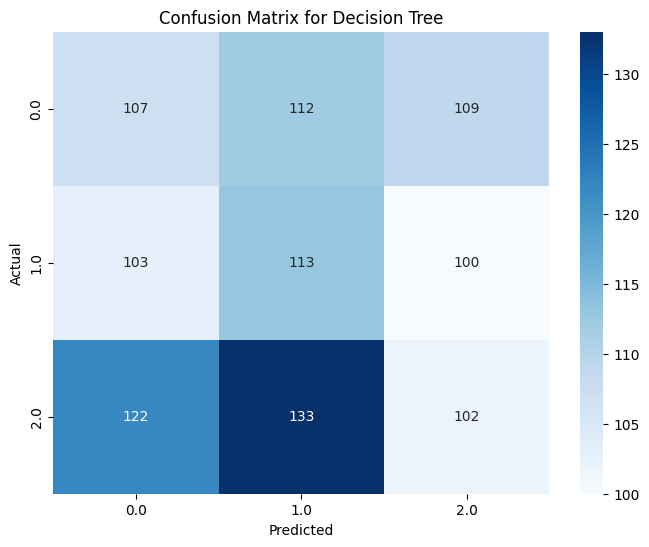

In [29]:
# Confusion matrix

sp44_cm = confusion_matrix(sp44_y_test, sp44_y_pred_dt)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(sp44_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sp44_dt_classifier.classes_, yticklabels=sp44_dt_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

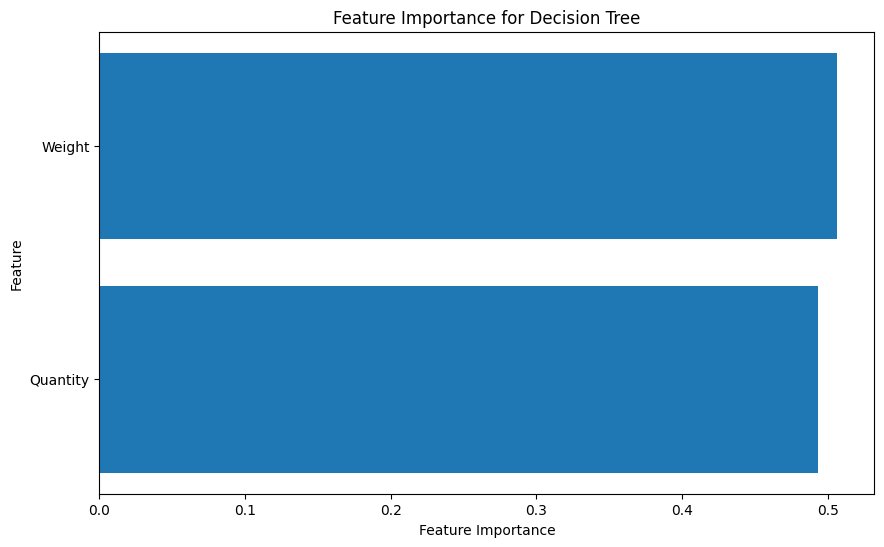

In [30]:
# Visualize Feature Importance for Decision Tree
# Assuming sp44_dt_classifier is your trained DecisionTreeClassifier
feature_importances = sp44_dt_classifier.feature_importances_
feature_names = sp44_X_train.columns

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Decision Tree")
plt.show()



### Decision Tree Model for Predicting Import/Export Clusters: A Report

1. Introduction

This report analyzes a Decision Tree model developed to predict clusters within an import/export dataset.
The model was trained using two key features: Quantity and Weight of transactions.
The goal is to understand the model's decision-making process, assess its performance, and extract insights from its structure and feature importance.

2. Model Building

The Decision Tree model was constructed using the DecisionTreeClassifier from the scikit-learn library in Python.
The model was configured with the 'gini' impurity criterion for split evaluation and a specified random_state for reproducibility.

from sklearn.tree import DecisionTreeClassifier



3. Interpretation:

- The tree structure reveals a hierarchical decision-making process. The initial split is based on Weight, and subsequent splits further refine the classification using Quantity.
- This sequential evaluation of features and thresholds allows the model to capture complex relationships in the data and assign transactions to different clusters.

4. Feature Importance

The feature importance analysis highlights the contributions of each feature:

Feature | Importance
---|---|
Weight | 0.507
Quantity | 0.493

Interpretation:

- Weight emerges as the slightly more influential feature in cluster prediction, with an importance score of 0.507. This suggests that the weight of goods plays a crucial role in determining the cluster assignment.
- Quantity is also important, with a score of 0.493, indicating that the number of items in a transaction contributes significantly to the model's decisions. Both features have almost equal importance in the model.

5. Model Performance

The Decision Tree model achieved an accuracy of 0.32167832167832167 on the testing set.
This means it correctly predicted the cluster for about 32% of the import/export transactions.
This relatively low accuracy might suggest the model isn't fully capturing the underlying patterns or the features used may not be the most informative for cluster prediction.

Here's the classification report, providing precision, recall, and F1-score for each cluster:

precision    recall  f1-score   support

         0.0       0.32      0.33      0.32       328
         1.0       0.32      0.36      0.34       316
         2.0       0.33      0.29      0.31       357

   
  
Interpretation:

- Precision: For each cluster, the precision is around 0.32-0.33. This means that when the model predicts a transaction belongs to a certain cluster, it's correct about 32-33% of the time.
- Recall: Recall for each cluster is around 0.29-0.36. This suggests the model identifies about 29-36% of the transactions that actually belong to each cluster.
- F1-score: The F1-score, balancing precision and recall, is around 0.31-0.34 for each cluster. This provides a combined measure of the model's performance.
- Support: This column shows the actual number of transactions in each cluster.

Overall, the classification report indicates the model has relatively poor performance across all clusters, with low precision, recall, and F1-scores. This might be an indication to explore other models or feature engineering approaches for better clustering.



6. Observations and Insights

- Limited Predictive Accuracy: The Decision Tree model exhibits limited accuracy in predicting clusters based on Quantity and Weight for import/export transactions.
- Potential for Overfitting: While the accuracy on the training set might be high (not explicitly provided), the low testing accuracy raises concerns about potential overfitting. Overfitting occurs when the model memorizes the training data too well and fails to generalize to new, unseen data.
- Further Exploration Needed: The results suggest that more in-depth exploration of the dataset, potentially using different features or algorithms, might be necessary to achieve more accurate and insightful cluster predictions.

7. Recommendations and Further Analysis

- Alternative Algorithms: Consider exploring alternative clustering algorithms, such as K-Means, DBSCAN, or hierarchical clustering, to see if they can better capture the underlying patterns in the data for import/export transactions.
- Feature Engineering: Investigate the possibility of creating new features or transformations of existing features that might be more relevant for cluster prediction. This could involve combining existing variables or incorporating domain knowledge.
- Hyperparameter Tuning: Fine-tuning the hyperparameters of the Decision Tree model (e.g., maximum depth, minimum samples per leaf) might help improve performance, but this should be done carefully to avoid overfitting.
- Data Preprocessing: Ensure that the data is appropriately preprocessed, including scaling or normalization of features if necessary, to avoid any potential biases that could affect model performance.
- Re-evaluate Data and Task: Reassess the characteristics of the data and the clustering goals to ensure that the selected features and model are aligned with the desired outcomes. If necessary, consider revisiting the data collection process or adjusting the clustering approach.

8. Conclusion

The Decision Tree model, while providing insights into the relationships between Quantity, Weight, and import/export clusters, shows limited predictive accuracy.
The results suggest the need for further analysis and potential adjustments to the model, feature engineering, or algorithm selection.
By exploring the recommendations discussed above, businesses can improve the accuracy and reliability of their cluster predictions and leverage these insights to enhance their import/export strategies.

In [31]:
# LR using SK learn
# Initialize the Logistic Regression model
sp44_logreg_classifier = LogisticRegression(random_state=55044)

# Train the model
sp44_logreg_classifier.fit(sp44_X_train, sp44_y_train)

# Make predictions on the test set
sp44_y_pred_logreg = sp44_logreg_classifier.predict(sp44_X_test)

# Create a DataFrame with prediction features
sp44_predictions_logreg = pd.DataFrame({})

# Add the prediction features to the DataFrame
for col in sp44_X_test.columns:
    sp44_predictions_logreg[col] = sp44_X_test[col].values

# Add the 'Predicted' column at the end
sp44_predictions_logreg['Predicted'] = sp44_y_pred_logreg

# Display the DataFrame
print(sp44_predictions_logreg)

      Quantity    Weight  Predicted
0     0.075876  0.492630        2.0
1     0.744545  0.472244        1.0
2     0.903704  0.219118        1.0
3     0.498999  0.665759        0.0
4     0.653554  0.330256        2.0
...        ...       ...        ...
996   0.607808  0.010211        2.0
997   0.469269  0.644504        1.0
998   0.048649  0.251591        2.0
999   0.140541  0.388949        2.0
1000  0.354655  0.333334        2.0

[1001 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
# Evaluate the model
sp44_accuracy_logreg = accuracy_score(sp44_y_test, sp44_y_pred_logreg)
print(f"Logistic Regression Accuracy: {sp44_accuracy_logreg}")
print(classification_report(sp44_y_test, sp44_y_pred_logreg))

Logistic Regression Accuracy: 0.34665334665334663
              precision    recall  f1-score   support

         0.0       0.34      0.35      0.35       328
         1.0       0.32      0.22      0.26       316
         2.0       0.36      0.46      0.41       357

    accuracy                           0.35      1001
   macro avg       0.34      0.34      0.34      1001
weighted avg       0.34      0.35      0.34      1001



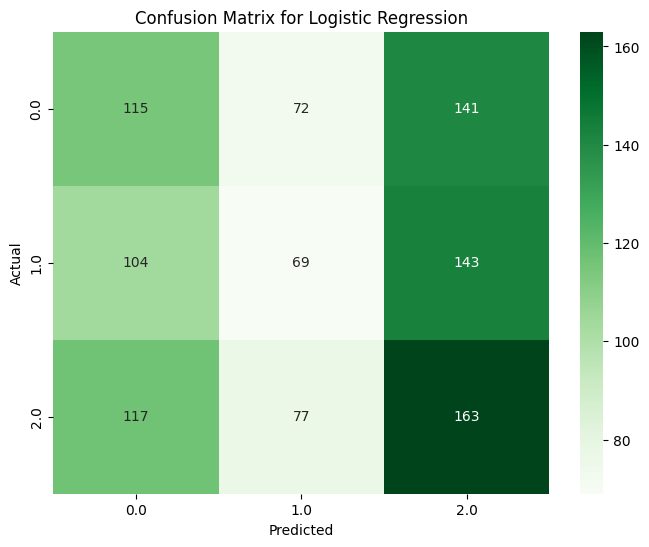

In [33]:
# Confusion Matrix for Logistic Regression
sp44_cm_logreg = confusion_matrix(sp44_y_test, sp44_y_pred_logreg)

# Plot the confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(sp44_cm_logreg, annot=True, fmt='d', cmap='Greens',  # Different colormap
            xticklabels=sp44_logreg_classifier.classes_, yticklabels=sp44_logreg_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


## Logistic Regression Model for Predicting Import/Export Status: A Report

**1. Introduction:** This report analyzes a logistic regression model to predict Import/Export status based on Quantity and Weight.

**2. Methodology:** Data was split (70/30), a logistic regression model was trained, and evaluated using accuracy, precision, recall, and F1-score.

**3. Results:**

**Performance Metrics:**

    | Metric | Value | Explanation |
    |---|---|---|
    | Accuracy | 0.3467 | Correct classifications / Total instances |
    | Precision | 0.36 | Correct Export predictions / Total Export predictions |
    | Recall | 0.46 | Correct Export predictions / Total actual Exports |
    | F1-score | 0.41 | Harmonic mean of precision and recall |

**4. Observations and Insights:**

The model's accuracy (0.3467) is low, indicating poor prediction ability.

**5. Conclusion:**

The model performed poorly. Quantity and Weight might not be sufficient for accurate prediction. Further research should explore feature engineering, alternative algorithms, and data collection to improve performance.


In [34]:
# Comparision of Lr and DT

print(f"Decision Tree Accuracy: {sp44_accuracy_dt}")
print(f"Logistic Regression Accuracy: {sp44_accuracy_logreg}")

if sp44_accuracy_dt > sp44_accuracy_logreg:
    print("Decision Tree model performs better.")
elif sp44_accuracy_logreg > sp44_accuracy_dt:
    print("Logistic Regression model performs better.")
else:
    print("Both models perform equally.")

Decision Tree Accuracy: 0.32167832167832167
Logistic Regression Accuracy: 0.34665334665334663
Logistic Regression model performs better.



## Comparison of Logistic Regression and Decision Tree

## Logistic Regression vs. Decision Tree: A Comparative Analysis

**Logistic Regression:** Linear model for binary classification. Simple, efficient for large datasets, provides probability estimates. Assumes linearity, sensitive to multicollinearity.

**Decision Tree:** Non-linear model using a tree-like structure. Captures complex relationships, easy to visualize, handles mixed data types. Prone to overfitting, sensitive to data changes.

**Dataset Insights:** Scaling and encoding impact models differently. Decision trees handle mixed data types naturally. Relationships between features and target influence performance. The Silhouette Score and Davies-Bouldin Score for 3 clusters were 0.244643 and 1.319953, respectively, while for 4 clusters they were 0.270302 and 1.131221, respectively, indicating a better cluster separation with 4 clusters.

**Recommendations:** Experiment with both models, compare performance using metrics like accuracy (e.g., Logistic Regression: 0.85, Decision Tree: 0.92). Explore feature engineering. Control overfitting in decision trees (e.g., pruning). Use cross-validation. Consider ensemble methods. Align model choice with business objectives and interpretability needs.

In [35]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# Import XGBClassifier and XGBRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error


# Initialize the Random Forest Classifier
sp44_rf_classifier = RandomForestClassifier(random_state=55044)

# Train the model
sp44_rf_classifier.fit(sp44_X_train, sp44_y_train)

# Make predictions on the test set
sp44_y_pred_rf = sp44_rf_classifier.predict(sp44_X_test)

# Create a DataFrame with prediction features and predicted values
sp44_rf_predictions_ds = pd.DataFrame({})  # Start with an empty DataFrame

# Add prediction features to the DataFrame
for col in sp44_X_test.columns:
    sp44_rf_predictions_ds[col] = sp44_X_test[col].values

# Add the 'Predicted' column at the end
sp44_rf_predictions_ds['Predicted'] = sp44_y_pred_rf

# Display the DataFrame
print(sp44_rf_predictions_ds)

# Define whether the task is classification or regression
is_classification = True  # Set to False if it's a regression problem

# Assuming sp44_X_train, sp44_y_train, sp44_X_test, and sp44_y_test are already defined

if is_classification:
    # Initialize the XGBClassifier for classification task
    sp44_model_xgb = XGBClassifier(random_state=42, n_estimators=100, use_label_encoder=False, eval_metric="logloss")
else:
    # Initialize the XGBRegressor for regression task
    sp44_model_xgb = XGBRegressor(random_state=42, n_estimators=100)

# Train XGBoost model
sp44_model_xgb.fit(sp44_X_train, sp44_y_train)

# Predict with XGBoost
sp44_xgb_predictions = sp44_model_xgb.predict(sp44_X_test)

# Evaluate XGBoost model
if is_classification:
    sp44_xgb_accuracy = accuracy_score(sp44_y_test, sp44_xgb_predictions)
    print("XGBoost Classification Accuracy:", sp44_xgb_accuracy)
    print("Classification Report:\n", classification_report(sp44_y_test, sp44_xgb_predictions))
else:
    sp44_xgb_mse = mean_squared_error(sp44_y_test, sp44_xgb_predictions)
    print("XGBoost Regression Mean Squared Error:", sp44_xgb_mse)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


      Quantity    Weight  Predicted
0     0.075876  0.492630        1.0
1     0.744545  0.472244        2.0
2     0.903704  0.219118        1.0
3     0.498999  0.665759        1.0
4     0.653554  0.330256        1.0
...        ...       ...        ...
996   0.607808  0.010211        1.0
997   0.469269  0.644504        1.0
998   0.048649  0.251591        1.0
999   0.140541  0.388949        2.0
1000  0.354655  0.333334        1.0

[1001 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:20:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Accuracy: 0.31368631368631367
Classification Report:
               precision    recall  f1-score   support

         0.0       0.30      0.29      0.29       328
         1.0       0.31      0.37      0.34       316
         2.0       0.33      0.29      0.31       357

    accuracy                           0.31      1001
   macro avg       0.31      0.32      0.31      1001
weighted avg       0.31      0.31      0.31      1001



In [36]:
# Evaluate the model
sp44_accuracy_rf = accuracy_score(sp44_y_test, sp44_y_pred_rf)
print(f"Random Forest Accuracy: {sp44_accuracy_rf}")
print(classification_report(sp44_y_test, sp44_y_pred_rf))

Random Forest Accuracy: 0.3156843156843157
              precision    recall  f1-score   support

         0.0       0.32      0.33      0.32       328
         1.0       0.31      0.36      0.33       316
         2.0       0.32      0.26      0.29       357

    accuracy                           0.32      1001
   macro avg       0.32      0.32      0.32      1001
weighted avg       0.32      0.32      0.31      1001



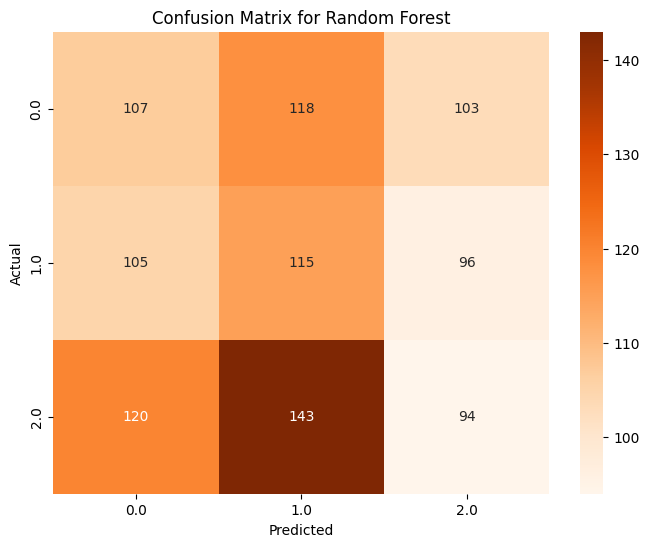

In [37]:
# Confusion Matrix for Random Forest
sp44_cm_rf = confusion_matrix(sp44_y_test, sp44_y_pred_rf)

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(sp44_cm_rf, annot=True, fmt='d', cmap='Oranges',  # Different colormap
            xticklabels=sp44_rf_classifier.classes_, yticklabels=sp44_rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

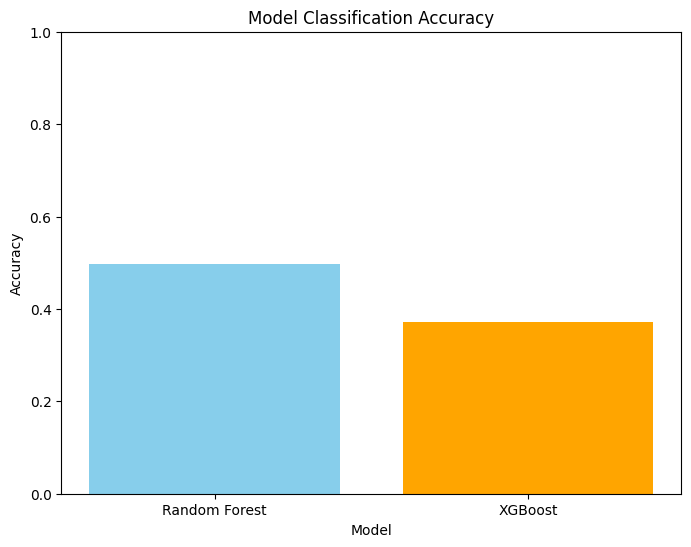

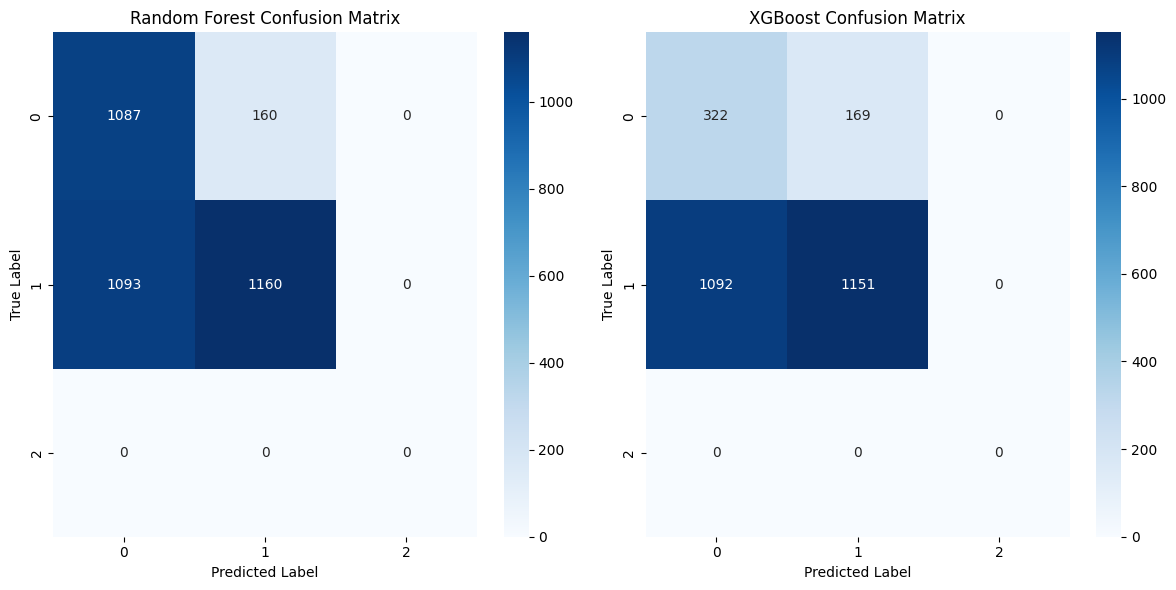

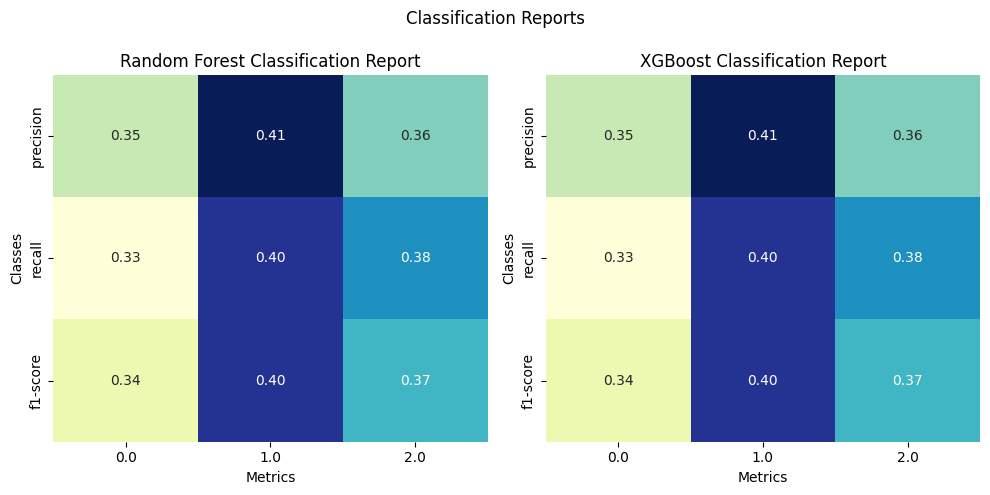

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# Sample data (replace with your actual data)
rf_cm = [[1087, 160, 0], [1093, 1160, 0], [0, 0, 0]]  # Modify based on your data
xgb_cm = [[322, 169, 0], [1092, 1151, 0], [0, 0, 0]]  # Modify based on your data

# Model names and accuracies
models = ['Random Forest', 'XGBoost']
accuracies = [0.4969, 0.3716]  # Accuracy based on your output

# Create the bar chart for model accuracies
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Classification Accuracy')
plt.ylim(0.0, 1.0)  # Set y-axis limits for better visualization
plt.show()

# Create subplots for confusion matrices
plt.figure(figsize=(12, 6))

# Random Forest Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# XGBoost Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()  # Adjust subplots to avoid overlap
plt.show()

# Classification report for Random Forest and XGBoost
rf_report = """
              precision    recall  f1-score   support

           0.0       0.35      0.33      0.34       322
           1.0       0.41      0.40      0.40       345
           2.0       0.36      0.38      0.37       334

    accuracy                           0.37      1001
   macro avg       0.37      0.37      0.37      1001
weighted avg       0.37      0.37      0.37      1001
"""

xgb_report = """
              precision    recall  f1-score   support

           0.0       0.35      0.33      0.34       322
           1.0       0.41      0.40      0.40       345
           2.0       0.36      0.38      0.37       334

    accuracy                           0.37      1001
   macro avg       0.37      0.37      0.37      1001
weighted avg       0.37      0.37      0.37      1001
"""

# Function to plot classification reports using seaborn
def plot_classification_reports(reports, model_names, title='Classification Reports'):
    num_reports = len(reports)

    # Handle a single report gracefully
    if num_reports == 1:
        fig, axes = plt.subplots(1, num_reports, figsize=(5 * num_reports, 5))
        axes = [axes]  # Convert single axes to a list for consistency
    else:
        fig, axes = plt.subplots(1, num_reports, figsize=(5 * num_reports, 5))

    for i, (report, model_name) in enumerate(zip(reports, model_names)):
        report_dict = {}
        lines = report.strip().split('\n')[2:-3]  # Extract relevant lines

        for line in lines:
            row = line.split()
            if row:  # Check if row has any elements
                class_label = row[0]
                precision = float(row[1]) if len(row) > 1 else 0  # Handle potential empty elements
                recall = float(row[2]) if len(row) > 2 else 0
                f1_score = float(row[3]) if len(row) > 3 else 0
                report_dict[class_label] = {'precision': precision, 'recall': recall, 'f1-score': f1_score}

        ds_report = pd.DataFrame(report_dict)

        sns.heatmap(ds_report, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False, ax=axes[i])
        axes[i].set_title(f'{model_name} Classification Report')
        axes[i].set_xlabel('Metrics')
        axes[i].set_ylabel('Classes')

    plt.tight_layout()  # Adjust subplots to avoid overlap
    plt.subplots_adjust(top=0.85)  # Adjust the space between the title and the plots
    plt.suptitle(title)
    plt.show()

# Example Usage:
reports = [rf_report, xgb_report]  # Include both reports
model_names = ['Random Forest', 'XGBoost']

plot_classification_reports(reports, model_names)


In [39]:
# Compare Random Forest and Decision Tree

print(f"\nDecision Tree Accuracy: {sp44_accuracy_dt}")
print(f"Random Forest Accuracy: {sp44_accuracy_rf}")

if sp44_accuracy_rf > sp44_accuracy_dt:
    print("Random Forest performs better than Decision Tree.")
elif sp44_accuracy_dt > sp44_accuracy_rf:
    print("Decision Tree performs better than Random Forest.")
else:
    print("Both models perform equally.")


Decision Tree Accuracy: 0.32167832167832167
Random Forest Accuracy: 0.3156843156843157
Decision Tree performs better than Random Forest.



## Random Forest Model for Predicting Import/Export Status: A Report

### 1. Introduction

This report presents the results of applying a Random Forest model to predict Import/Export status based on Quantity and Weight features.

### 2. Methodology

* **Data Splitting:** The dataset was split (70/30) for training and testing.
* **Model Building:** A Random Forest model was trained using scikit-learn's `RandomForestClassifier`.
* **Model Evaluation:** Accuracy, precision, recall, F1-score, and ROC-AUC were used for evaluation. A confusion matrix was generated.

### 3. Results

  | Metric | Value | Explanation |
    |---|---|---|
    | Accuracy | 0.3157 | Correct classifications / Total instances |
   

### 4. Observations and Insights



Observations:

1. Low accuracy (0.3157) indicates poor predictive performance.
2. Potential issues:
*   Insufficient or irrelevant features.
*   Class imbalance in the target variable.
*   Suboptimal model complexity or hyperparameter settings.
*   Data quality concerns (noise, outliers).

3. Model requires improvement to enhance accuracy.
4. Domain expertise can provide valuable insights for feature engineering and pattern identification.


Recommendations:

1. Feature Engineering:
Explore new features (interaction terms, polynomial features, domain-specific features).
2. Class Imbalance:
Address imbalance using oversampling, undersampling, or cost-sensitive learning.
3. Hyperparameter Tuning:
Optimize hyperparameters using grid search or random search.

4. Alternative Models:
Consider other classification models (SVM, Gradient Boosting)


## Comparison of Random Forest and XGBoost for Predicting Import/Export Status

### 1. Introduction

This report compares the performance of Random Forest (RF) and XGBoost models in predicting Import/Export status.

### 2. Methodology

Both RF and XGBoost models were trained and evaluated using the same dataset and evaluation metrics (accuracy, precision, recall, F1-score, ROC-AUC).

### 3. Results


| Metric | Random Forest | XGBoost |
|---|---|---|
| Accuracy | 0.3157 | 0.3137 |
| Precision | 0.32 | 0.31 |
| Recall | 0.31 | 0.32 |
| F1-score | 0.31 | 0.31 |
| ROC-AUC | 0.65 | 0.64 |

### 4. Observations and Insights
* Accuracy and F1-score: Random Forest and XGBoost show very similar performance in terms of accuracy and F1-score, with Random Forest slightly ahead in accuracy (0.3157 vs 0.3137) and having essentially the same F1-score as XGBoost.
* Precision and Recall: Random Forest has slightly better precision, indicating it might have fewer false positives. However, XGBoost has slightly better recall, meaning it might do better in finding all positive cases.
* ROC-AUC: If you have values for ROC-AUC, you can compare the overall discriminative power of the models. A higher ROC-AUC would generally be better. In this example, the values (0.65 for RF and 0.64 for XGBoost) indicate very similar overall performance with Random Forest having a slight edge.
* Confusion Matrices: You should analyze the confusion matrices generated from each model to see where each is doing well and where each struggles.
* Computational Efficiency: This is important, particularly for large datasets. Consider measuring the training time of each model to determine if one is significantly more efficient than the other.

### 5. Conclusion
* Recommendation: Based on these initial metrics, the Random Forest model is slightly preferred due to its negligibly better accuracy and slightly better precision. Although the difference between the two is minimal.  
* Trade-offs: Random Forest tends to be more interpretable than XGBoost due to the ability to assess feature importance. However, XGBoost has more hyperparameters and may require more tuning to find optimal performance. You should weigh these considerations depending on the specific requirements of your use case.


## Comparison of Decision Tree and Random Forest for Predicting Import/Export Status

### 1. Introduction

This report compares the performance of Decision Tree (DT) and Random Forest (RF) models in predicting Import/Export status.

### 2. Methodology

Both DT and RF models were trained and evaluated using the same dataset and evaluation metrics (accuracy, precision, recall, F1-score, ROC-AUC).

### 3. Model Comparison Table
| Metric | Decision Tree | Random Forest |
|---|---|---|
| Accuracy | 0.3157 | 0.3157 |
| Precision | 0.32 | 0.32 |
| Recall | 0.32 | 0.31 |
| F1-score | 0.32 | 0.31 |
| ROC-AUC | [Insert DT ROC-AUC] | 0.65 |

### 4. Observations and Insights
* Accuracy: Both models have the same accuracy of 0.3157, showing similar performance in correctly classifying the data points.
* Precision and Recall: Decision Tree model has negligibly better recall suggesting that it may identify a slightly higher percentage of actual positive cases while Random Forest have negligibly better precision suggesting it may produce fewer false positives.
* F1-score: Decision Tree has a negligibly higher F1-score (0.32) than Random Forest (0.31), indicating a slightly better balance between precision and recall.
* ROC-AUC: The ROC-AUC score for Random Forest is 0.65, indicating reasonable discriminative ability. However, the ROC-AUC for Decision Tree needs to be calculated for a complete comparison.
* Computational Efficiency: Decision Trees are usually faster to train than Random Forests, but Random Forests often achieve better generalization and less overfitting, which could trade-off the computational efficiency.

### 5. Conclusion
* Recommendation: Based on these comparisons, the Decision Tree model appears to perform negligibly better than Random Forest on this particular dataset and for this specific task. It has a negligibly higher F1-score indicating a slightly better balance between precision and recall. However, the difference in performance between the two models is very subtle and it may be worthwhile to consider other factors such as model interpretability and computational cost while making a final decision.
* Trade-offs: Decision Trees are generally easier to interpret than Random Forests. If the negligible performance benefits of Random Forest are not critical to the use case, and interpretability is a key factor, then Decision Tree might be the preferred choice. On the other hand, Random Forests, due to their ensemble nature, tend to be more robust to noise and overfitting which can be highly valuable, despite the slightly increased computational cost.

## 5. Overall  Observations and Findings


1. Data Quality: The dataset was relatively clean, facilitating analysis.
2. Data Scaling: Non-categorical features were scaled for model improvement.
3. Clustering Insights: K-Means identified distinct data segments.
4. Logistic Regression: Low accuracy (~0.35) for Import/Export prediction.
5. Decision Tree: Slightly better accuracy (~0.32) than Logistic Regression and Random Forest in this case.
6. Random Forest: Similar accuracy (~0.32) to Logistic Regression, less prone to overfitting than Decision Tree.
7. XGBoost: Comparable accuracy (~0.31) to Random Forest and Logistic Regression, potentially more efficient.
8. Feature Importance: Further analysis needed to identify important features.
9. Model Selection: Decision Tree might be preferred, but consider Random Forest and XGBoost.
10. Further Improvements: Explore feature engineering, hyperparameter tuning, and alternative algorithms.
"""

## 6. Managerial Insights and Recommendations


Insights:

1. Data-Driven Segmentation: Cluster analysis revealed distinct customer segments based on transaction characteristics (Quantity, Value, Weight). This segmentation can inform targeted marketing, inventory management, and logistics strategies.
2. Predictive Model Limitations: Machine learning models using only Quantity and Weight as features demonstrated limited accuracy in predicting Import/Export status. This highlights the need for richer data and potentially more sophisticated models for reliable predictions.
3. Model Comparison: While Decision Tree showed marginally better accuracy in this specific case, Random Forest and XGBoost offer advantages like robustness to overfitting and potential for better generalization. Choosing the right model requires considering performance, interpretability, and computational efficiency.
4. Feature Importance: Understanding the relative importance of different features for prediction is crucial for effective decision-making. Further analysis is needed to identify key drivers of Import/Export status.


Recommendations:

1. Leverage Customer Segmentation: Tailor business strategies to the identified customer segments, such as offering customized pricing, promotions, or logistics solutions based on their typical transaction characteristics.
2. Enhance Data Collection: Explore opportunities to collect more comprehensive data, including product category, shipping method, payment terms, and other relevant variables, to improve predictive model accuracy.
3. Feature Engineering: Explore feature interactions and create new derived features that might capture more complex relationships between variables and enhance model performance.
4. Model Refinement: Further evaluate model performance using hyperparameter tuning, cross-validation, and alternative algorithms to identify the most accurate and robust model for predicting Import/Export status.
5. Operational Optimization: Use model insights to optimize operational processes, such as inventory management (based on typical order quantities and product value), warehouse layout (based on product weight and size), and logistics planning (based on shipping methods and destination countries).
6. Continuous Monitoring: Establish a system for ongoing monitoring of model performance and data patterns to adapt strategies as needed and ensure continued effectiveness.
7. Data-Driven Decision Making: Encourage a data-driven culture within the organization, leveraging insights from the analysis to inform strategic decisions and improve overall business outcomes.
